#**H2O AutoML Credit Card Customers Churn Classification💡**

# **Abstract 💰 -**

*   The bank's manager is concerned about customers leaving their credit card
services. The goal of this analysis is to create a model that predicts whether a customer is likely to leave or not. This prediction will help the bank proactively engage with at-risk customers, provide better services, and ultimately reduce customer churn.

# **Insights into the data -**


*   The dataset contains information on 10,127 bank customers.
*  Categorical features include customer attrition status, gender, education level, marital status, income category, and card category.
* Numerical features include customer age, number of dependents, months as a customer, total product count, months of inactivity, contact count, credit limit, revolving balance, average open-to-buy credit, transaction amount changes, total transaction amount, total transaction count, transaction count changes, and average credit card utilization ratio.
* Attrition_Flag indicates customer churn status, where "Attrited Customer" represents churned customers, and "Existing Customer" represents those who haven't churned.
* The dataset is suitable for analyzing customer behavior and predicting churn.

#Importing required Libraries and H20 Initialization -

* The process of automating machine learning's end-to-end application to real-world issues is known as automated machine learning, or AutoML.

* Developers can concentrate on other tasks like data collecting, feature engineering, and model deployment by using H2O AutoML to automate processes like basic data processing, model training and tuning, ensemble, and stacking of many models to give the models with the greatest performance.


--> The next steps involve initializing H2O.

In [91]:
#Installing Dependencies
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

In [92]:
# Importing all the libararies required for the assignment
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import time
import json
import scipy.stats as stats
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

sns.set(rc={"figure.figsize": (12, 10)})

In [93]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [94]:
#minimum memory size (in gigabytes) that should be allocated
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

2


In [95]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)
#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:20405..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpba1b7x5v
  JVM stdout: /tmp/tmpba1b7x5v/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpba1b7x5v/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:20405
Connecting to H2O server at http://127.0.0.1:20405 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         08 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    1 month and 30 days
H2O_cluster_name:           H2O_from_python_unknownUser_tstslv
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:20405
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

#Exploratory Data Analysis (EDA) on Dataset -

In [96]:
# Reading CSV file into Pandas DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/ckulkarni13/Data_Science_Methods_Tools/main/BankChurners.csv")
df_encoded = pd.read_csv("https://raw.githubusercontent.com/ckulkarni13/Data_Science_Methods_Tools/main/BankChurners.csv")

In [97]:
# Checking number of rows and columns of data
df.shape

(10127, 23)

- There are 23 columns in the dataset and a total of 10,127 rows.

In [98]:
# Count the number of categorical and numerical columns
data_types = df.dtypes
categorical_columns = data_types[data_types == 'object'].index
numerical_columns = data_types[data_types != 'object'].index

num_categorical_columns = len(categorical_columns)
num_numerical_columns = len(numerical_columns)

print(f'Number of Categorical Columns: {num_categorical_columns}')
print(f'Number of Numerical Columns: {num_numerical_columns}')

Number of Categorical Columns: 6
Number of Numerical Columns: 17


In [99]:
# Further insights into the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [100]:
# Getting a glimpse into the dataset
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [101]:
# Checking names of columns
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [102]:
#Checking if their are any missing values
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [103]:
# Descriptive analysis for categorical data
df.describe(include='O')

Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127           10127          10127   
unique                  2      2               7              4   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            3128           4687   

       Income_Category Card_Category  
count            10127         10127  
unique               6             4  
top     Less than $40K          Blue  
freq              3561          9436

In [104]:
# Descriptive analysis for numerical data
df.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
count         10127.000000           10127.000000   
mean              0.712222               0.274894   
std               0.238086               0.275691   
min               0.000000               0.000000   
25%               0.582000               0.023000   
50%               0.702000               0.176000   
75%               0.818000               0.503000   
max               3.714000               0.999000   

       Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
count                                       10127.000000                                                                                    
mean                                            0.159997                                                                                    
std                                             0.365301                                                                                    
min                                             0.000008                                                                                    
25%                                             0.000099                                                                                    
50%                                             0.000181                                                                                    
75%                                             

**Features Extraction -**
- CLIENTNUM : Unique client identifier.
- Attrition_Flag : Indicates whether the customer's account is active or has churned.
- Customer_Age : Age of the customer.
- Gender : Gender of the customer.
- Dependent_count : Number of dependents of the customer.
- Education_Level : Educational level of the customer.
- Marital_Status : Marital status of the customer.
- Income_Category : Income category of the customer.
- Card_Category : Category of the credit card held by the customer.
- Months_on_book : Number of months the customer has been a bank client.
- Total_Relationship_Count : Total number of bank products held by the customer.
- Months_Inactive_12_mon : Number of months with inactivity in the last 12 months.
- Contacts_Count_12_mon : Number of contacts with the bank in the last 12 months.
- Credit_Limit : Credit limit on the credit card.
- Total_Revolving_Bal : Total revolving balance on the credit card.
- Avg_Open_To_Buy : Average open to buy credit line on the credit card.
- Total_Amt_Chng_Q4_Q1 : Change in transaction amount over the last four quarters.
- Total_Trans_Amt : Total transaction amount in the last 12 months.
- Total_Trans_Ct : Total transaction count in the last 12 months.
- Total_Ct_Chng_Q4_Q1 : Change in transaction count over the last four quarters.
- Avg_Utilization_Ratio : Average utilization ratio of the credit card.

In [105]:
# Dropping columns with unusual names
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

#Dropping CLIENTNUM column as it's a unique identifier and not useful for predictions.
df = df.drop( 'CLIENTNUM', axis=1)

In [106]:
#Shape of data after non-useful columns dropped for the dataset
df.shape

(10127, 20)

In [107]:
# Gaining insights into new dataframe created
df.describe()

Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [108]:
# Dropping columns with unusual names
df_encoded = df_encoded.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

#Dropping CLIENTNUM column as it's a unique identifier and not useful for predictions.
df_encoded = df_encoded.drop( 'CLIENTNUM', axis=1)

#Q-Q Plot:

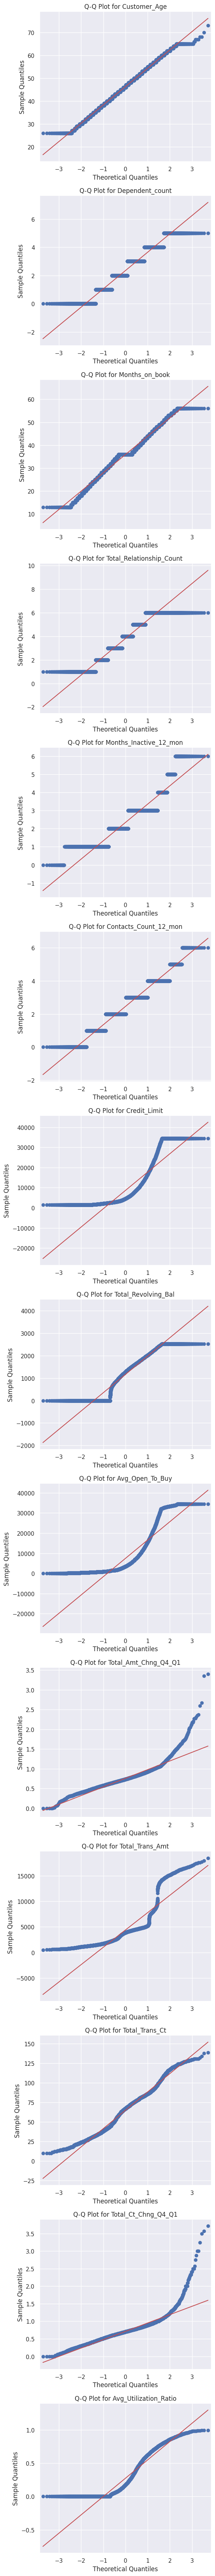

In [109]:
# Set up the figure and axes
numeric_columns_list = df.select_dtypes(include=['int', 'float']).columns.tolist()
fig, axes = plt.subplots(nrows=len(numeric_columns_list), figsize=(6, 5 * len(numeric_columns_list)))

# Plot Q-Q plots for each numeric variable
for i, variable in enumerate(numeric_columns_list):
    # Generate Q-Q plot using statsmodels
    sm.qqplot(df[variable], line='s', ax=axes[i])
    axes[i].set_title(f'Q-Q Plot for {variable}')  # Set plot title

# Adjust layout
plt.tight_layout()
plt.show()


#Label Encoding the Dataset -

In [110]:
# Encoding categorical data to numerical value.
categorical_features = [
    'Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
    'Income_Category', 'Card_Category'
]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical feature
for feature in categorical_features:
    df_encoded[feature] = label_encoder.fit_transform(df_encoded[feature])

# Now, the categorical features are label encoded in the DataFrame

###OLS Regression Method -

In [111]:
#OLS Regression method.
var = sm.OLS(df_encoded['Attrition_Flag'], df_encoded[['Customer_Age', 'Dependent_count', 'Months_on_book',
    'Total_Relationship_Count', 'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
    'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]).fit()

var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Attrition_Flag   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              6835.
Date:                Tue, 20 Feb 2024   Prob (F-statistic):                        0.00
Time:                        03:26:18   Log-Likelihood:                         -1933.5
No. Observations:               10127   AIC:                                      3893.
Df Residuals:                   10114   BIC:                                      3987.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Customer_Age                 0.0004      0.001      0.739      0.460      -0.001       0.001
Dependent_count             -0.0114      0.002     -5.231      0.000      -0.016      -0.007
Months_on_book               0.0004      0.001      0.659      0.510      -0.001       0.002
Total_Relationship_Count     0.0437      0.002     22.610      0.000       0.040       0.048
Months_Inactive_12_mon      -0.0416      0.003    -14.783      0.000      -0.047      -0.036
Contacts_Count_12_mon       -0.0408      0.003    -16.032      0.000      -0.046      -0.036
Credit_Limit              3.362e-05   1.66e-06     20.295      0.000    3.04e-05    3.69e-05
Total_Revolving_Bal       6.573e-05   3.49e-06     18.847      0.000    5.89e-05    7.26e-05
Avg_Open_To_Buy           -3.21e-05   1.85e-06    -17.346      0.000   -3.57e-05   -2.85e-05
Total_Amt_Chng_Q4_Q1         0.0663      0.014      4.825      0.000       0.039       0.093
Total_Trans_Amt          -3.493e-05   1.54e-06    -22.700      0.000   -3.79e-05   -3.19e-05
Total_Trans_Ct               0.0097      0.000     47.819      0.000       0.009       0.010
Total_Ct_Chng_Q4_Q1          0.2973      0.013     22.311      0.000       0.271       0.323
Avg_Utilization_Ratio       -0.0055      0.018     -0.306      0.760      -0.041       0.030
==============================================================================
Omnibus:                     1230.913   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1755.028
Skew:                          -0.936   Prob(JB):                         0.00
Kurtosis:                       3.811   Cond. No.                     7.13e+15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 6.13e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

###HeatMap -
* To find correlations between numeric variables and the target variable

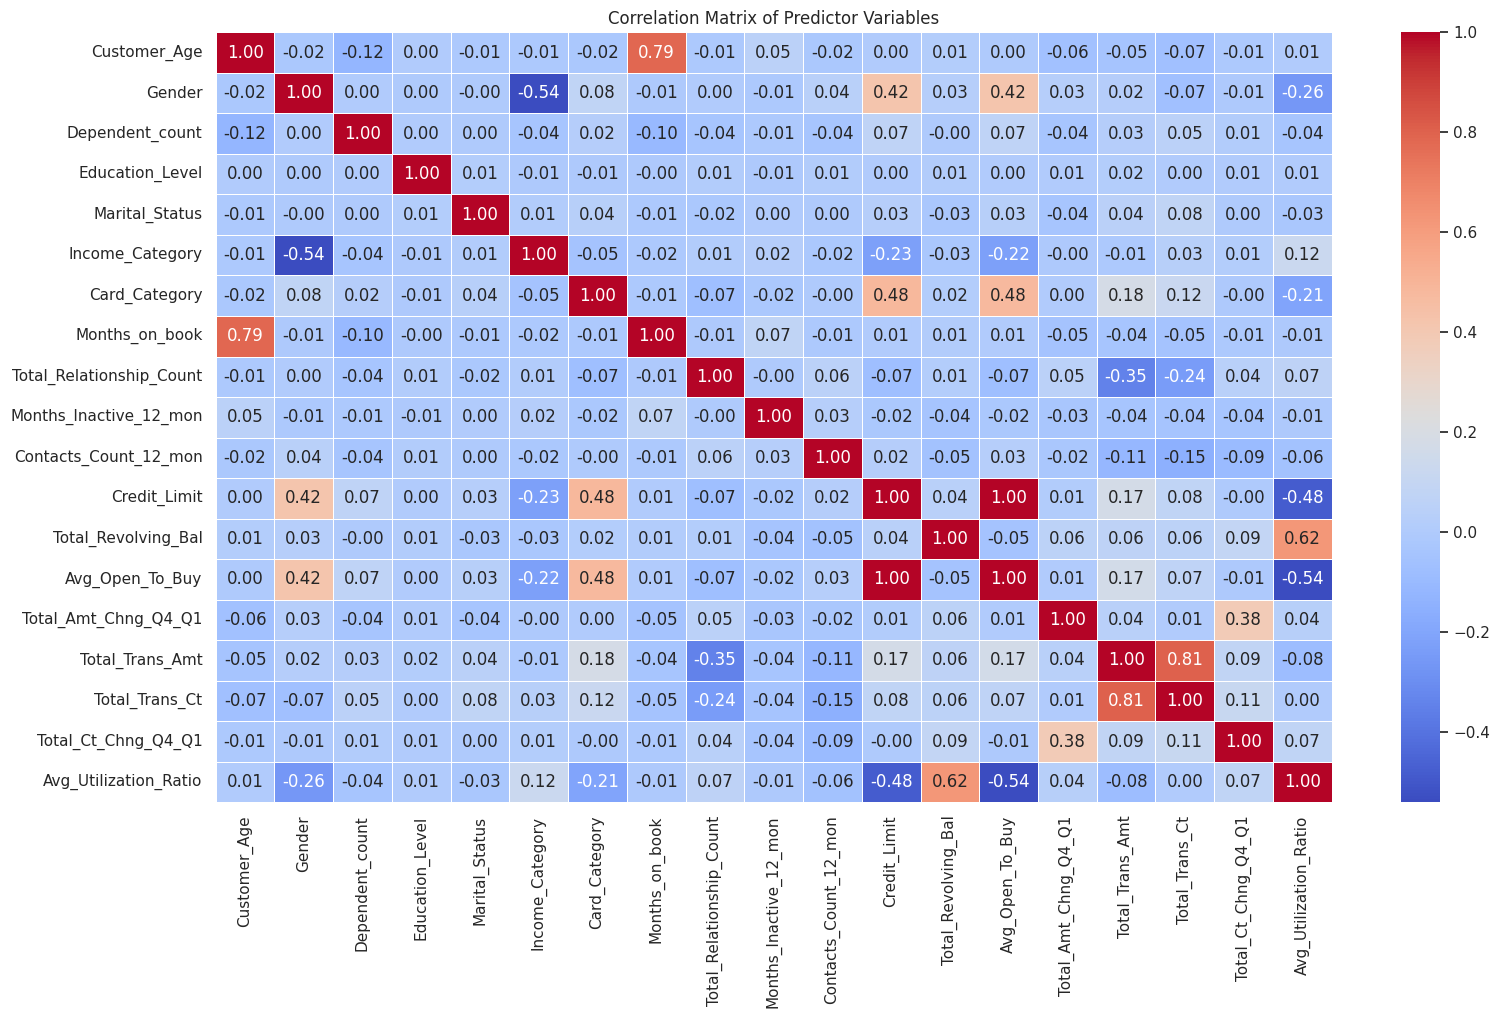

In [112]:
# 1. Calculate correlations between numeric variables and the target variable
predictor_variables = df_encoded.drop(columns=['Attrition_Flag'])  # Exclude the target variable

# Calculate the correlation matrix
correlation_matrix = predictor_variables.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Predictor Variables')
plt.show()

###VIF (Variance Inflation Facto) a measure of the amount of multicollinearity

In [113]:
 # Select features for VIF calculation (excluding target variable 'Attrition_Flag')
from statsmodels.stats.outliers_influence import variance_inflation_factor
features_for_vif = df_encoded.drop(['Attrition_Flag'], axis=1)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = features_for_vif.columns
vif_data["VIF"] = [variance_inflation_factor(features_for_vif.values, i) for i in range(features_for_vif.shape[1])]

print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                    Variable        VIF
0               Customer_Age  77.332902
1                     Gender   3.044755
2            Dependent_count   4.084367
3            Education_Level   3.768079
4             Marital_Status   4.836794
5            Income_Category   6.010507
6              Card_Category   1.450771
7             Months_on_book  56.465206
8   Total_Relationship_Count   7.604975
9     Months_Inactive_12_mon   6.157851
10     Contacts_Count_12_mon   5.649438
11              Credit_Limit        inf
12       Total_Revolving_Bal        inf
13           Avg_Open_To_Buy        inf
14      Total_Amt_Chng_Q4_Q1  14.166335
15           Total_Trans_Amt   8.724527
16            Total_Trans_Ct  24.010254
17       Total_Ct_Chng_Q4_Q1  11.863691
18     Avg_Utilization_Ratio   5.839804


#Outliers Detection (Boxplot), Robust Scaling to Normalize & check if data is balanced or unbalanced  -

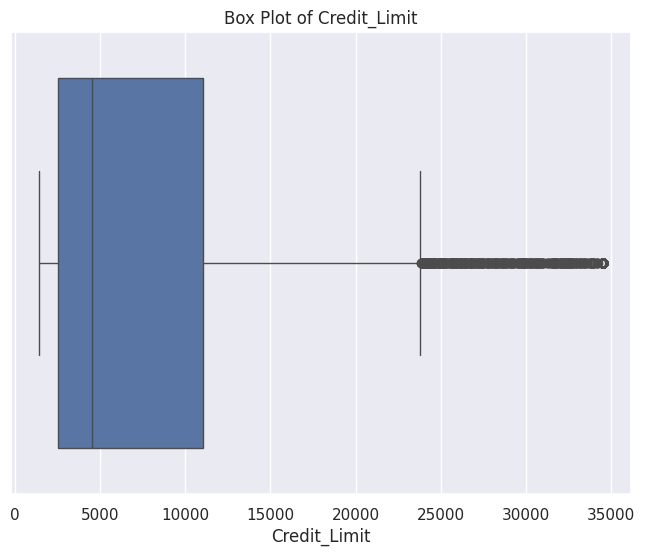

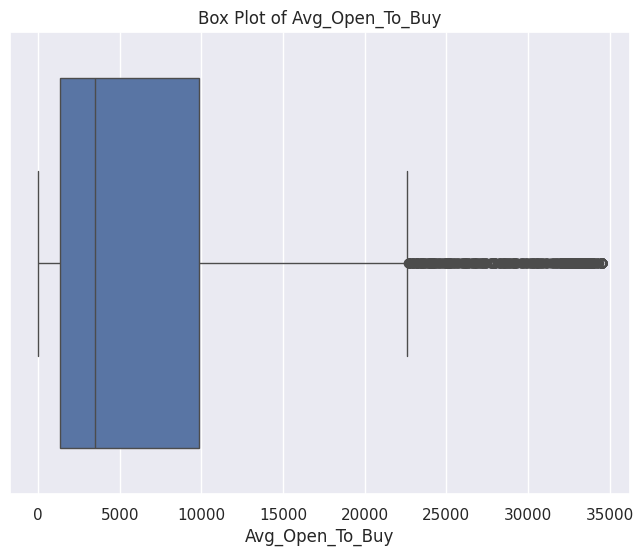

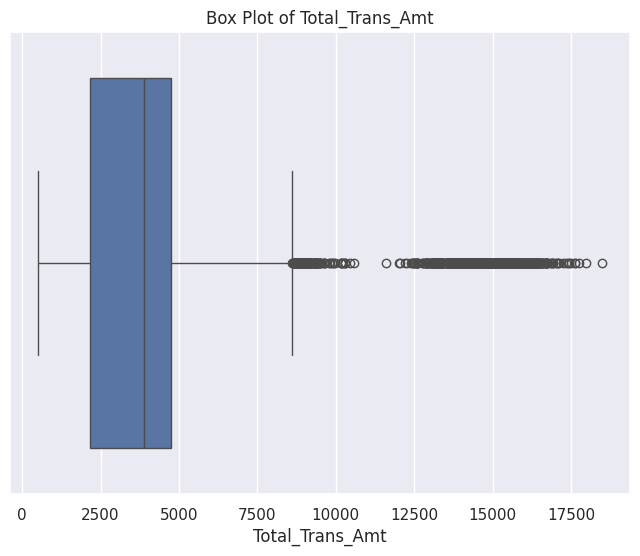

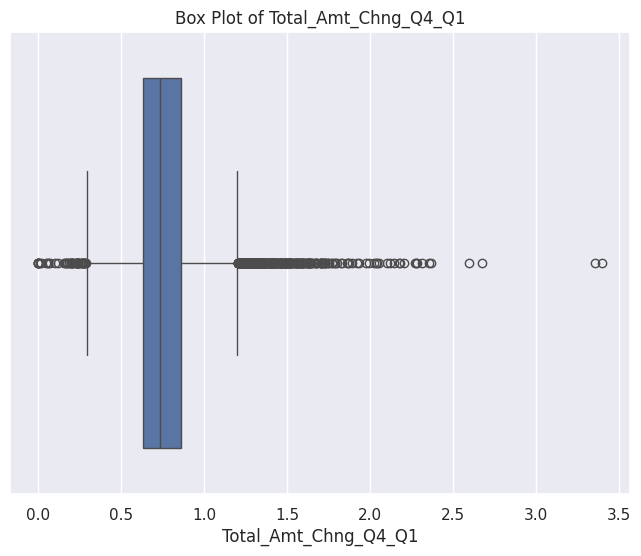

In [114]:
# Create box plots for numeric variables (excluding 'Attrition_Flag')
numeric_columns = ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1']

for column in numeric_columns:
    # Set the figure size
    plt.figure(figsize=(8, 6))
    # Create the box plot
    sns.boxplot(x=df_encoded[column])
    # Set labels and title
    plt.xlabel(column)
    plt.title(f'Box Plot of {column}')
    # Show the plot
    plt.show()


##Robut Scaler -Normalizing the data.

In [115]:
from sklearn.preprocessing import RobustScaler

# Create a RobustScaler object
scaler = RobustScaler()

# Fit the scaler to the two columns with outliers and transform them
normalized_columns = scaler.fit_transform(df_encoded[['Credit_Limit',  'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1']])

# Update the original DataFrame with the normalized values
df_encoded[['Credit_Limit',  'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1']] = normalized_columns

In [116]:
df_encoded[['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1']].describe()

Credit_Limit  Avg_Open_To_Buy  Total_Trans_Amt  Total_Amt_Chng_Q4_Q1
count  10127.000000     10127.000000     10127.000000          10127.000000
mean       0.479642         0.468116         0.195353              0.105003
std        1.067698         1.065169         1.313916              0.961433
min       -0.365427        -0.406702        -1.310772             -3.228070
25%       -0.234244        -0.251860        -0.674338             -0.460526
50%        0.000000         0.000000         0.000000              0.000000
75%        0.765756         0.748140         0.325662              0.539474
max        3.520352         3.637237         5.641075             11.671053

##Check if data is balanced or unbalanced - Unbalanced Data!

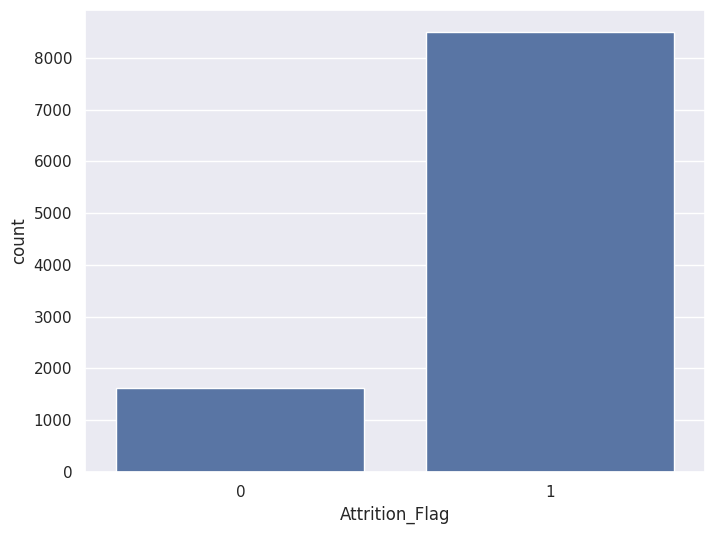

In [117]:
# To check whther dataset is balanced or not
# Assuming 'target' is your target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition_Flag', data=df_encoded)
plt.show()

#H2o AutoML Execution

In [118]:
# Convert pandas DataFrame to H2O Frame
hf = h2o.H2OFrame(df_encoded)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [119]:
hf.types

{'Attrition_Flag': 'int',
 'Customer_Age': 'int',
 'Gender': 'int',
 'Dependent_count': 'int',
 'Education_Level': 'int',
 'Marital_Status': 'int',
 'Income_Category': 'int',
 'Card_Category': 'int',
 'Months_on_book': 'int',
 'Total_Relationship_Count': 'int',
 'Months_Inactive_12_mon': 'int',
 'Contacts_Count_12_mon': 'int',
 'Credit_Limit': 'real',
 'Total_Revolving_Bal': 'int',
 'Avg_Open_To_Buy': 'real',
 'Total_Amt_Chng_Q4_Q1': 'real',
 'Total_Trans_Amt': 'real',
 'Total_Trans_Ct': 'int',
 'Total_Ct_Chng_Q4_Q1': 'real',
 'Avg_Utilization_Ratio': 'real'}

In [120]:
pct_rows=0.80
hf_train, hf_test = hf.split_frame([pct_rows])

In [121]:
print(hf_train.shape)
print(hf_test.shape)

(8159, 20)
(1968, 20)


In [122]:
#Display all columns in X
X = hf.columns
print(X)

['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [123]:
#Seperate Dependent variable from Independent variable
y_output ='Attrition_Flag'
X.remove(y_output)
print('Features except target variable: ',X)
print('Target Variable: ',y_output)

Features except target variable:  ['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
Target Variable:  Attrition_Flag


##Passing data through AutoML -

In [124]:
#Set the AutoML
aml = H2OAutoML(max_runtime_secs=run_time, sort_metric='MAE',max_models=10 ,seed=1, exclude_algos=['DeepLearning'])

#Pass the data through H20AutoML
aml.train(x=X,y=y_output,training_frame=hf_train)

AutoML progress: |
03:26:38.224: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███████
03:27:02.664: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
03:27:04.850: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

████████
03:27:34.68: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███
03:27:44.451: _response par

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20240220_32637


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  7/10
# GBM base models (used / total)      3/4
# XGBoost base models (used / total)  3/3
# DRF base models (used / total)      1/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.006321766816836403
RMSE: 0.07950953915623209
MAE: 0.04055719287693688
RMSLE: 0.05941858463509753
Mean Residual Deviance: 0.006321766816836403
R^2: 0.9534397499803111
Null degrees of freedom: 8158
Residual degrees of freedom: 8151
Null deviance: 1107.7967888221751
Residual deviance: 51.57929545856821
AIC: -18142.950708793534

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.025864342223505244
RMSE: 0.16082394791667454
MAE: 0.07757859266248739
RMSLE: 0.11474750906981429
Mean Residual Deviance: 0.025864342223505244
R^2: 0.8095073299265028
Null degrees of freedom: 8158
Residual degrees of freedom: 8150
Null deviance: 1108.039124582
Residual deviance: 211.0271682015793
AIC: -6646.008582216355

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.0775335  0.00359488  0.0721078     0.0798032     0.0758242     0.0788834     0.081049
mean_residual_deviance  0.0259268  0.00227117  0.023082      0.0280455     0.0253452     0.024729      0.0284325
mse                     0.0259268  0.00227117  0.023082      0.0280455     0.0253452     0.024729      0.0284325
null_deviance           221.608    9.57091     216.109       222.737       223.742       235.528       209.922
r2                      0.809094   0.015166    0.819522      0.790844      0.813317      0.825958      0.795828
residual_deviance       42.2181    2.82889     38.9394       46.5836       41.7689       40.9512       42.8477
rmse                    0.160894   0.00706043  0.151928      0.167468      0.159202      0.157254      0.168619
rmsle                   0.114832   0.00506422  0.108691      0.1196        0.11256       0.112761      0.120549

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

##Getting the best model through AutoML leaderboard -

In [125]:
# Get the AutoML leaderboard
leaderboard = aml.leaderboard

# Print the leaderboard
print(leaderboard)

model_id                                                      mae      rmse        mse     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20240220_32637     0.0775786  0.160824  0.0258643  0.114748                 0.0258643
StackedEnsemble_BestOfFamily_1_AutoML_1_20240220_32637  0.0784362  0.162414  0.0263783  0.115336                 0.0263783
GBM_4_AutoML_1_20240220_32637                           0.0786506  0.164318  0.0270004  0.116818                 0.0270004
GBM_3_AutoML_1_20240220_32637                           0.0798636  0.165008  0.0272276  0.117831                 0.0272276
GBM_2_AutoML_1_20240220_32637                           0.080145   0.165624  0.0274312  0.118189                 0.0274312
DRF_1_AutoML_1_20240220_32637                           0.0836128  0.178971  0.0320305  0.128408                 0.0320305
XRT_1_AutoML_1_20240220_32637                           0.088587   0.179749  0.0323095  0.128278                 0.0323095
XGBoost_2_AutoML

model_id                                                      mae      rmse        mse     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  ---------  --------  ---------  --------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_1_AutoML_1_20240220_32637     0.0775786  0.160824  0.0258643  0.114748                 0.0258643                5426                   0.104845  StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20240220_32637  0.0784362  0.162414  0.0263783  0.115336                 0.0263783                2576                   0.078217  StackedEnsemble
GBM_4_AutoML_1_20240220_32637                           0.0786506  0.164318  0.0270004  0.116818                 0.0270004                2348                   0.035497  GBM
GBM_3_AutoML_1_20240220_32637                           0.0798636  0.165008  0.0272276  0.117831                 0.0272276                1646                   0.021292  GBM
GBM_2_AutoML_1_20240220_32637                           0.080145   0.165624  0.0274312  0.118189                 0.0274312                2009                   0.021121  GBM
DRF_1_AutoML_1_20240220_32637                           0.0836128  0.178971  0.0320305  0.128408                 0.0320305                2745                   0.017236  DRF
XGBoost_2_AutoML_1_20240220_32637                       0.0951956  0.181575  0.0329695  0.128624                 0.0329695                3591                   0.00661   XGBoost
XGBoost_3_AutoML_1_20240220_32637                       0.0958536  0.177904  0.0316497  0.129709                 0.0316497                1076                   0.004439  XGBoost
GLM_1_AutoML_1_20240220_32637                           0.22037    0.292706  0.0856768  0.202007                 0.0856768                 117                   0.000982  GLM
[9 rows x 9 columns]

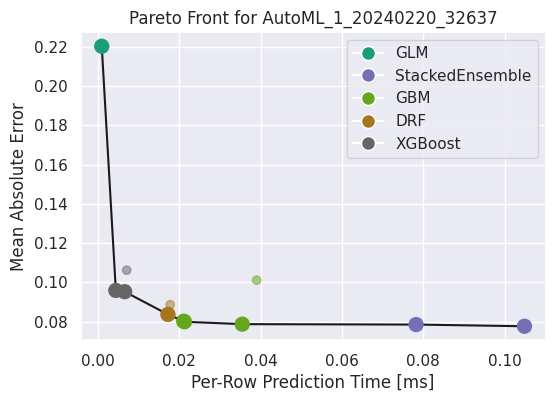

In [126]:
pf = aml.pareto_front()
fig = pf.figure()

# Adjust the size of the figure
fig.set_size_inches(6, 4)

# Display the plot
pf

In [127]:
best_model = aml.leader
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20240220_32637


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  7/10
# GBM base models (used / total)      3/4
# XGBoost base models (used / total)  3/3
# DRF base models (used / total)      1/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.006321766816836403
RMSE: 0.07950953915623209
MAE: 0.04055719287693688
RMSLE: 0.05941858463509753
Mean Residual Deviance: 0.006321766816836403
R^2: 0.9534397499803111
Null degrees of freedom: 8158


In [128]:
print("Best Model ID:", best_model.model_id)
print("Best Model MSE:", best_model.mse())

Best Model ID: StackedEnsemble_AllModels_1_AutoML_1_20240220_32637
Best Model MSE: 0.006321766816836403


In [129]:
best_model.algo

'stackedensemble'

In [130]:
predictions = best_model.predict(hf_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [131]:
target_column = "Attrition_Flag"

# Add the actual labels to the predictions DataFrame
predictions[target_column] = hf_test[target_column]

# Evaluate model performance
perf = best_model.model_performance(hf_test)
print(perf)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.024307205163087795
RMSE: 0.15590768153971052
MAE: 0.07262807306165021
RMSLE: 0.11173819626631351
Mean Residual Deviance: 0.024307205163087795
R^2: 0.8143935235165305
Null degrees of freedom: 1967
Residual degrees of freedom: 1960
Null deviance: 257.82901331019843
Residual deviance: 47.83657976095678
AIC: -1712.0794220975297


###Without Regularization - Is above to Original Model (H2O parsed df)

In [132]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

#without regularization
churn_glm = H2OGeneralizedLinearEstimator(family = 'binomial', lambda_ = 0, compute_p_values = True)

In [133]:
# With regularization
# 0 = L1 regularization (Ridge)
# 1 = L2 regularization (Lasso)
# between 0 and 1 = combination of L1 and L2 regularization (Elastic Net)
churn_glm_regularization = H2OGeneralizedLinearEstimator(family = 'binomial', lambda_ = 0.001, alpha = 0.5)

###With Regularization (ElasticNet) -

In [134]:
churn_glm_regularization.train(x = X, y = y_output, training_frame = hf_train)

glm Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708399551722_13


GLM Model: summary
    family    link    regularization                              number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Elastic Net (alpha = 0.5, lambda = 0.001 )  19                            17                             7                       py_461_sid_a984

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.07081370481452669
RMSE: 0.2661084455903771
LogLoss: 0.23802356830182272
AUC: 0.9225522580371065
AUCPR: 0.9821751132817466
Gini: 0.845104516074213
Null degrees of freedom: 8158
Residual degrees of freedom: 8141
Null deviance: 7229.20437321319
Residual deviance: 3884.068587549143
AIC: 3920.068587549143

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5409335267150716
       0     1     Error    Rate
-----  ----  ----  -------  --------------
0      808   514   0.3888   (514.0/1322.0)
1      255   6582  0.0373   (255.0/6837.0)
Total  1063  7096  0.0943   (769.0/8159.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.540934     0.944807  241
max f2                       0.180674     0.969845  346
max f0point5                 0.782035     0.943417  152
max accuracy                 0.558511     0.905748  235
max precision                0.999422     1         0
max recall                   0.01004      1         398
max specificity              0.999422     1         0
max absolute_mcc             0.689759     0.632215  188
max min_per_class_accuracy   0.843402     0.841451  120
max mean_per_class_accuracy  0.824123     0.846478  130
max tns                      0.999422     1322      0
max fns                      0.999422     6716      0
max fps                      0.0058864    1322      399
max tps                      0.01004      6837      398
max tnr                      0.999422     1         0
max fnr                      0.999422     0.982302  0
max fpr                      0.0058864    1         399
max tpr                      0.01004      1         398

Gains/Lift Table: Avg response rate: 83.80 %, avg score: 83.79 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain       cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  ---------  -----------------  --------------------
1        0.0100503                   0.999364           1.19336   1.19336            1                0.999576  1                           0.999576            0.0119936       0.0119936                  19.336     19.336             0.0119936
2        0.0201005                   0.998943           1.19336   1.19336            1                0.99913   1                           0.999353            0.0119936       0.0239871                  19.336     19.336             0.0239871
3        0.0300282                   0.998597           1.19336   1.19336            1                0.998758  1                           0.999157            0.0118473       0.0358344                  19.336     19.336             0.0358344
4        0.0400784                   0.99831            1.19336   1.19336            1                0.998445  1                           0.998978            0.0119936       0.047828                   19.336     19.336 

###With Lasso:
* Accuracy = 1 - training_classification_error = 1 - 0.09401 = 0.

In [135]:
churn_glm_regularization_lasso = H2OGeneralizedLinearEstimator(family = 'binomial', lambda_ = .001, alpha = 1)
churn_glm_regularization_lasso.train(x = X, y = y_output, training_frame = hf_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708399551722_15


GLM Model: summary
    family    link    regularization           number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  -----------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Lasso (lambda = 0.001 )  19                            16                             7                       py_461_sid_a984

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.07088503694502751
RMSE: 0.26624244016502613
LogLoss: 0.2379568113957594
AUC: 0.9227952736478584
AUCPR: 0.9823075675001555
Gini: 0.8455905472957168
Null degrees of freedom: 8158
Residual degrees of freedom: 8142
Null deviance: 7229.20437321319
Residual deviance: 3882.979248356002
AIC: 3916.979248356002

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5077381371146839
       0     1     Error    Rate
-----  ----  ----  -------  --------------
0      774   548   0.4145   (548.0/1322.0)
1      226   6611  0.0331   (226.0/6837.0)
Total  1000  7159  0.0949   (774.0/8159.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.507738     0.944698  251
max f2                       0.173393     0.969652  347
max f0point5                 0.729237     0.943539  173
max accuracy                 0.561464     0.905258  235
max precision                0.999455     1         0
max recall                   0.00975782   1         398
max specificity              0.999455     1         0
max absolute_mcc             0.684624     0.632073  189
max min_per_class_accuracy   0.840739     0.843419  122
max mean_per_class_accuracy  0.818717     0.846501  132
max tns                      0.999455     1322      0
max fns                      0.999455     6719      0
max fps                      0.00583442   1322      399
max tps                      0.00975782   6837      398
max tnr                      0.999455     1         0
max fnr                      0.999455     0.982741  0
max fpr                      0.00583442   1         399
max tpr                      0.00975782   1         398

Gains/Lift Table: Avg response rate: 83.80 %, avg score: 83.80 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain       cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  ---------  -----------------  --------------------
1        0.0100503                   0.999389           1.19336   1.19336            1                0.999593  1                           0.999593            0.0119936       0.0119936                  19.336     19.336             0.0119936
2        0.0201005                   0.998983           1.19336   1.19336            1                0.999169  1                           0.999381            0.0119936       0.0239871                  19.336     19.336             0.0239871
3        0.0300282                   0.998641           1.19336   1.19336            1                0.998812  1                           0.999193            0.0118473       0.0358344                  19.336     19.336             0.0358344
4        0.0400784                   0.998401           1.19336   1.19336            1                0.99851   1                           0.999022            0.0119936       0.047828                   19.336     19.336             0.047828
5        0.0500061                 

###With Ridge:

In [136]:
churn_glm_regularization_ridge = H2OGeneralizedLinearEstimator(family = 'binomial', lambda_ = .001, alpha = 0)
churn_glm_regularization_ridge.train(x = X, y = y_output, training_frame = hf_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708399551722_17


GLM Model: summary
    family    link    regularization            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Ridge ( lambda = 0.001 )  19                            19                             5                       py_461_sid_a984

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.07078351721098135
RMSE: 0.26605171905285885
LogLoss: 0.23814667879642157
AUC: 0.9223598591538388
AUCPR: 0.9821261956124596
Gini: 0.8447197183076776
Null degrees of freedom: 8158
Residual degrees of freedom: 8139
Null deviance: 7229.20437321319
Residual deviance: 3886.077504600008
AIC: 3926.077504600008

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5534946952560933
       0     1     Error    Rate
-----  ----  ----  -------  --------------
0      821   501   0.379    (501.0/1322.0)
1      264   6573  0.0386   (264.0/6837.0)
Total  1085  7074  0.0938   (765.0/8159.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.553495     0.945008  239
max f2                       0.189811     0.969864  344
max f0point5                 0.747842     0.943431  168
max accuracy                 0.553495     0.906239  239
max precision                0.99936      1         0
max recall                   0.0132724    1         397
max specificity              0.99936      1         0
max absolute_mcc             0.636107     0.632786  211
max min_per_class_accuracy   0.840608     0.842663  128
max mean_per_class_accuracy  0.826391     0.845979  135
max tns                      0.99936      1322      0
max fns                      0.99936      6691      0
max fps                      0.00592589   1322      399
max tps                      0.0132724    6837      397
max tnr                      0.99936      1         0
max fnr                      0.99936      0.978646  0
max fpr                      0.00592589   1         399
max tpr                      0.0132724    1         397

Gains/Lift Table: Avg response rate: 83.80 %, avg score: 83.80 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100503                   0.999346           1.19336   1.19336            1                0.999561  1                           0.999561            0.0119936       0.0119936                  19.336    19.336             0.0119936
2        0.0201005                   0.998909           1.19336   1.19336            1                0.9991    1                           0.99933             0.0119936       0.0239871                  19.336    19.336             0.0239871
3        0.0300282                   0.998549           1.19336   1.19336            1                0.998713  1                           0.999126            0.0118473       0.0358344                  19.336    19.336             0.0358344
4        0.0400784                   0.998242           1.19336   1.19336            1                0.998389  1                           0.998942            0.0119936       0.047828                   19.336    19.336             0.047828
5        0.0500061                   

In [137]:
import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                    rmse        mse        mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  --------  ---------  ---------  --------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_1_AutoML_1_20240220_32637     0.155908  0.0243072  0.0726281  0.111738                 0.0243072                5426                   0.122305  StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20240220_32637  0.157249  0.0247272  0.0737902  0.11167                  0.0247272                2576                   0.089664  StackedEnsemble
GBM_4_AutoML_1_20240220_32637                           0.159709  0.0255069  0.0746241  0.113339                 0.0255069                2348                   0.035211  GBM
GBM_3_AutoML_1_20240220_32637                           0.160523  0.0257677  0.0745187  0.114904                 0.0257677                1646                   0.034399  GBM
GBM_2_AutoML_1_20240220_32637                           0.160812  0.0258606  0.0747511  0.115255                 0.0258606                2009                   0.035286  GBM
GBM_1_AutoML_1_20240220_32637                           0.166715  0.0277939  0.0926827  0.118802                 0.0277939                3711                   0.057149  GBM
XGBoost_3_AutoML_1_20240220_32637                       0.166768  0.0278116  0.0866448  0.120365                 0.0278116                1076                   0.005702  XGBoost
XRT_1_AutoML_1_20240220_32637                           0.171631  0.0294572  0.0817806  0.121869                 0.0294572                2149                   0.027694  DRF
DRF_1_AutoML_1_20240220_32637                           0.17193   0.0295598  0.0772588  0.123024                 0.0295598                2745                   0.027555  DRF
XGBoost_2_AutoML_1_20240220_32637                       0.173531  0.0301129  0.0857112  0.123459                 0.0301129                3591                   0.006972  XGBoost
XGBoost_1_AutoML_1_20240220_32637                       0.178642  0.0319128  0.0955395  0.127912                 0.0319128                4838                   0.009051  XGBoost
GLM_1_AutoML_1_20240220_32637                           0.287463  0.0826348  0.217299   0.196993                 0.0826348                 117                   0.001492  GLM
[12 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

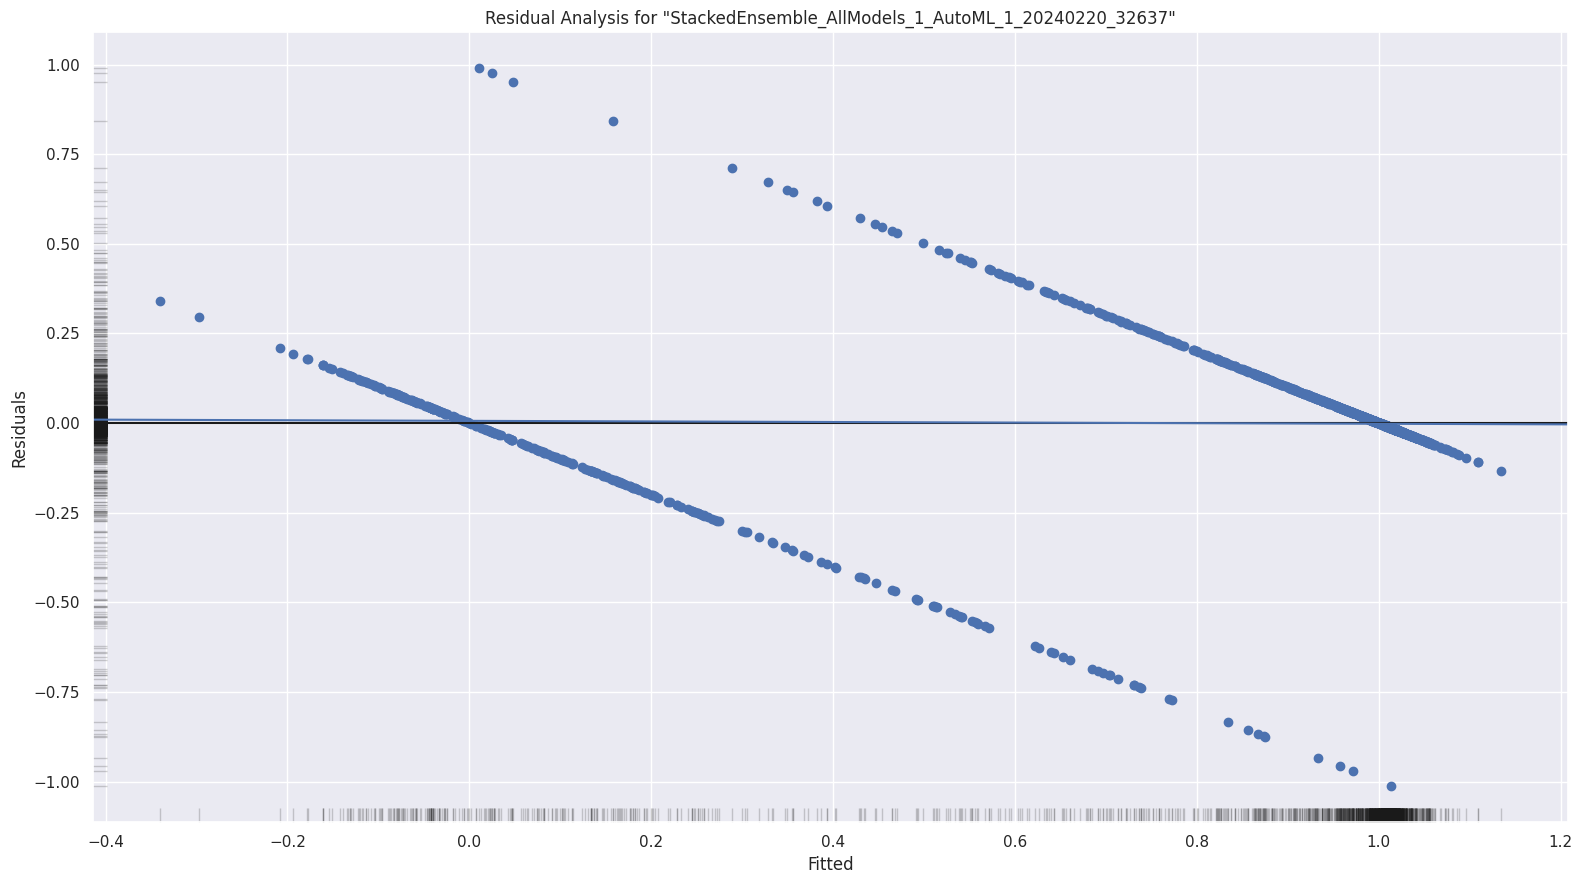

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

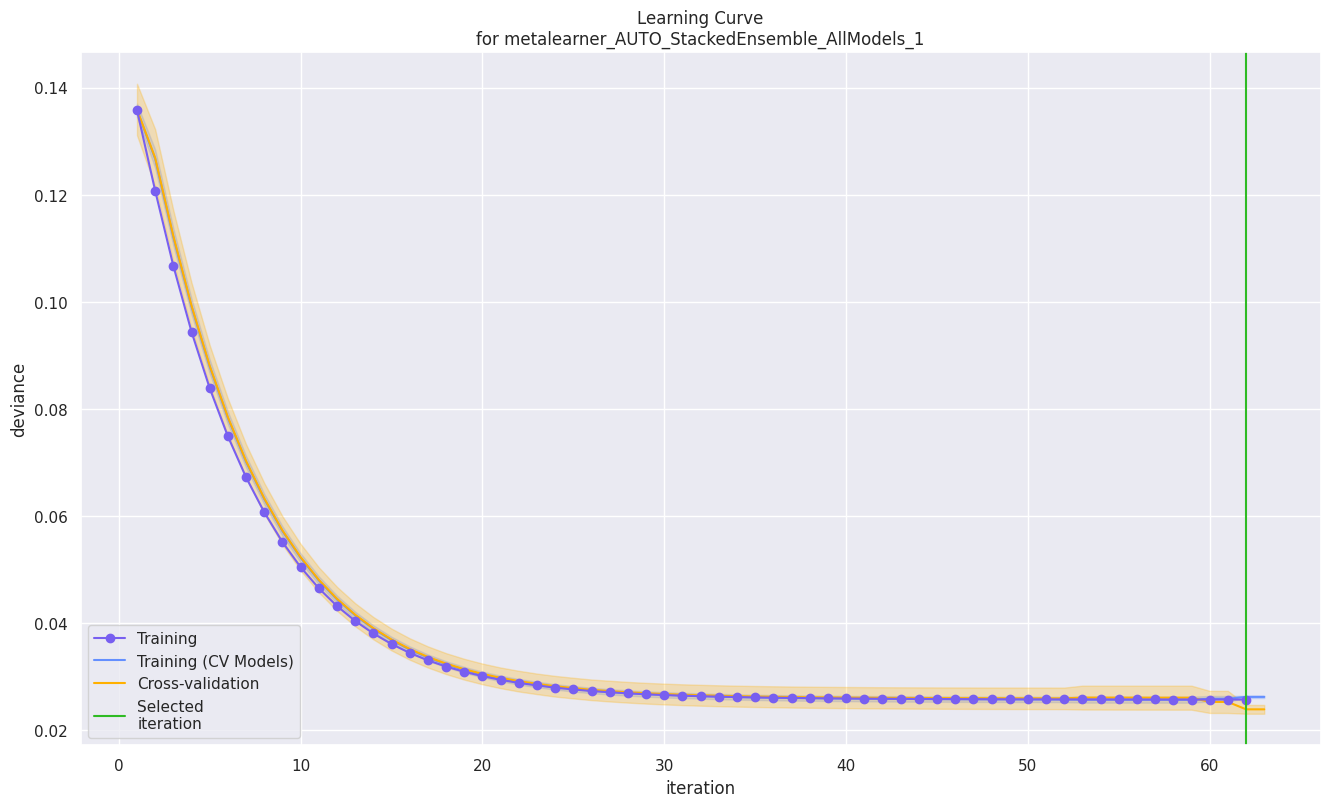

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

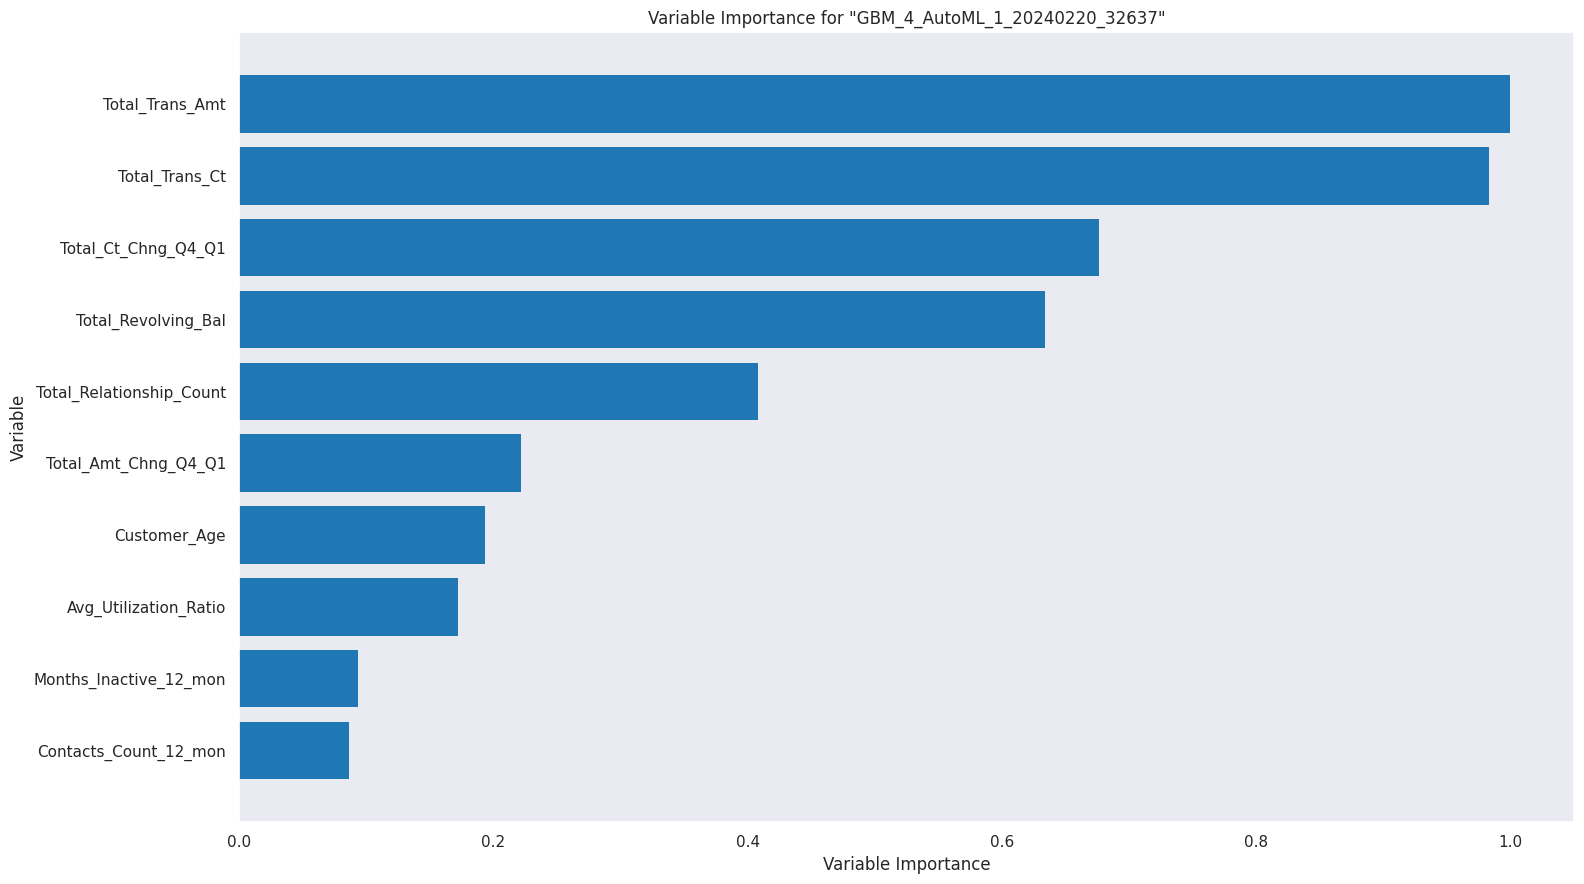

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

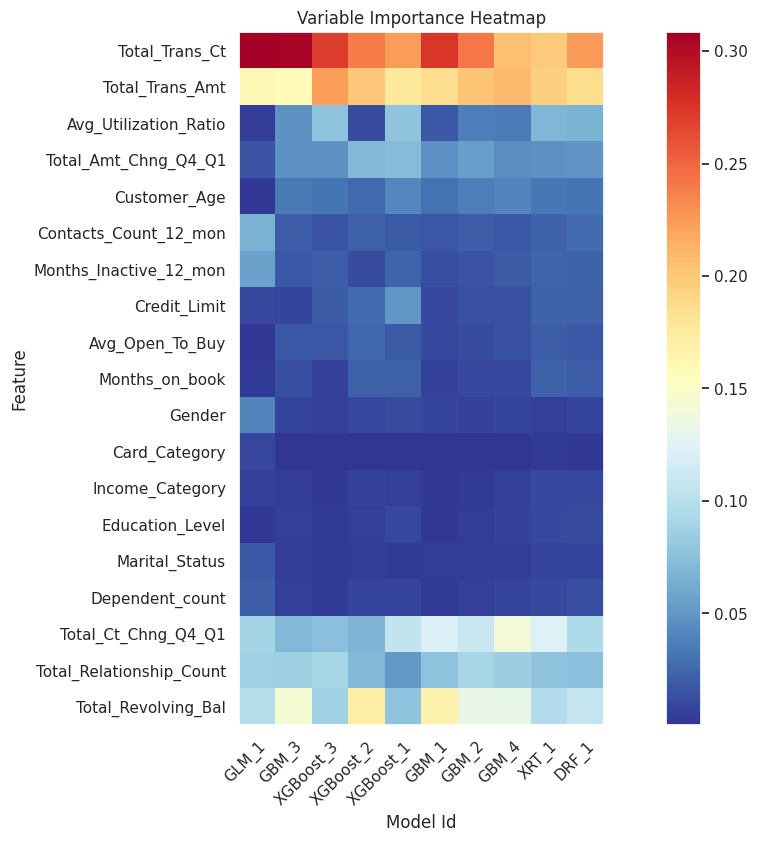

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

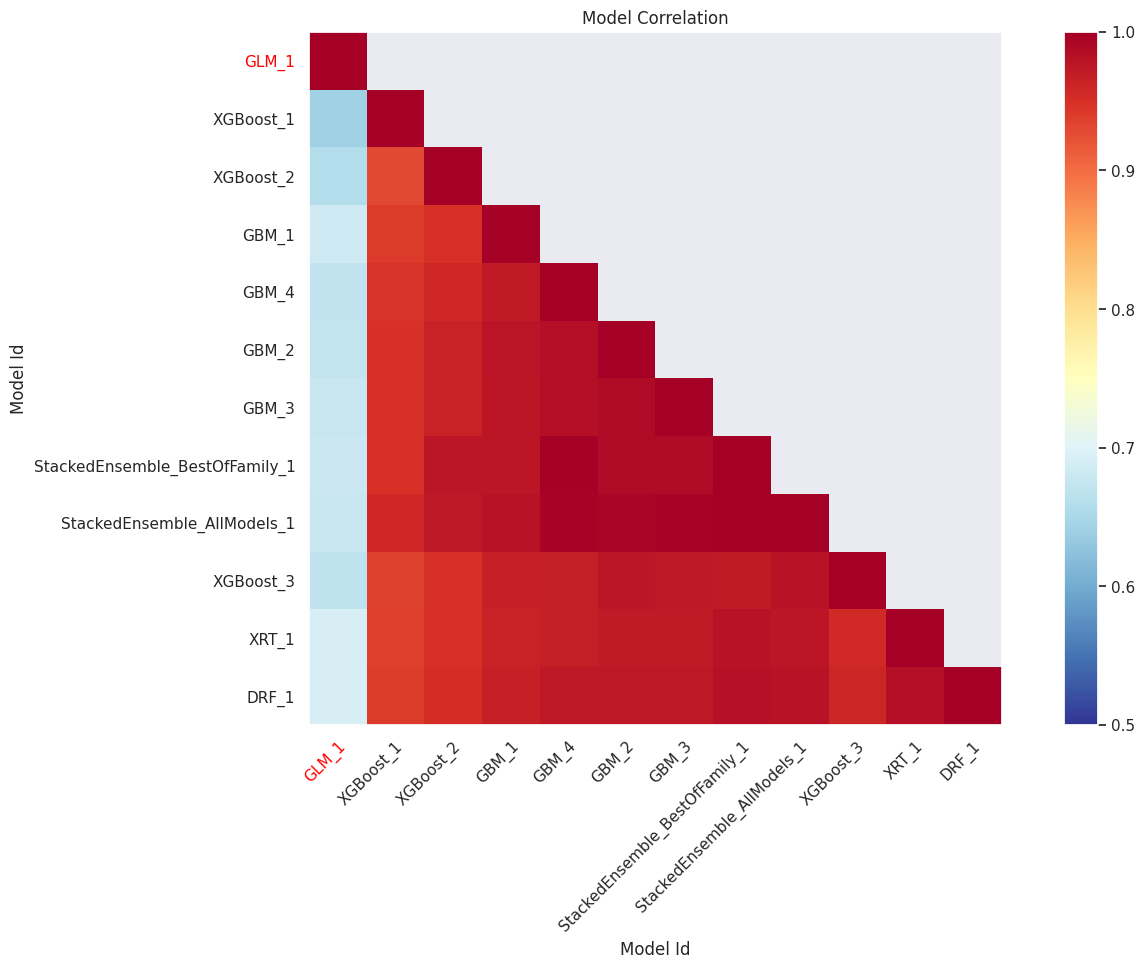

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

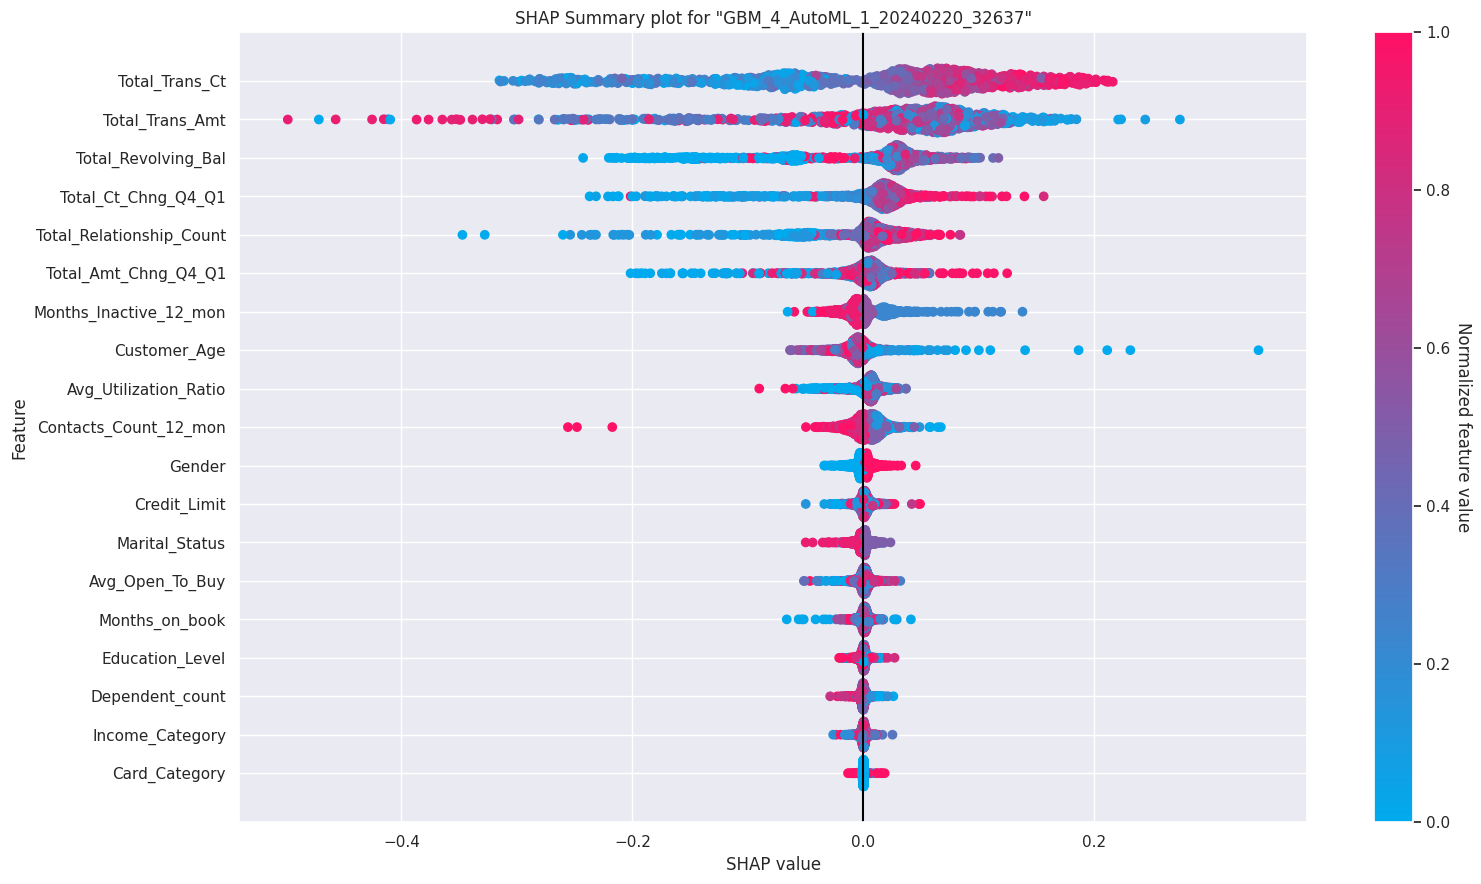

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

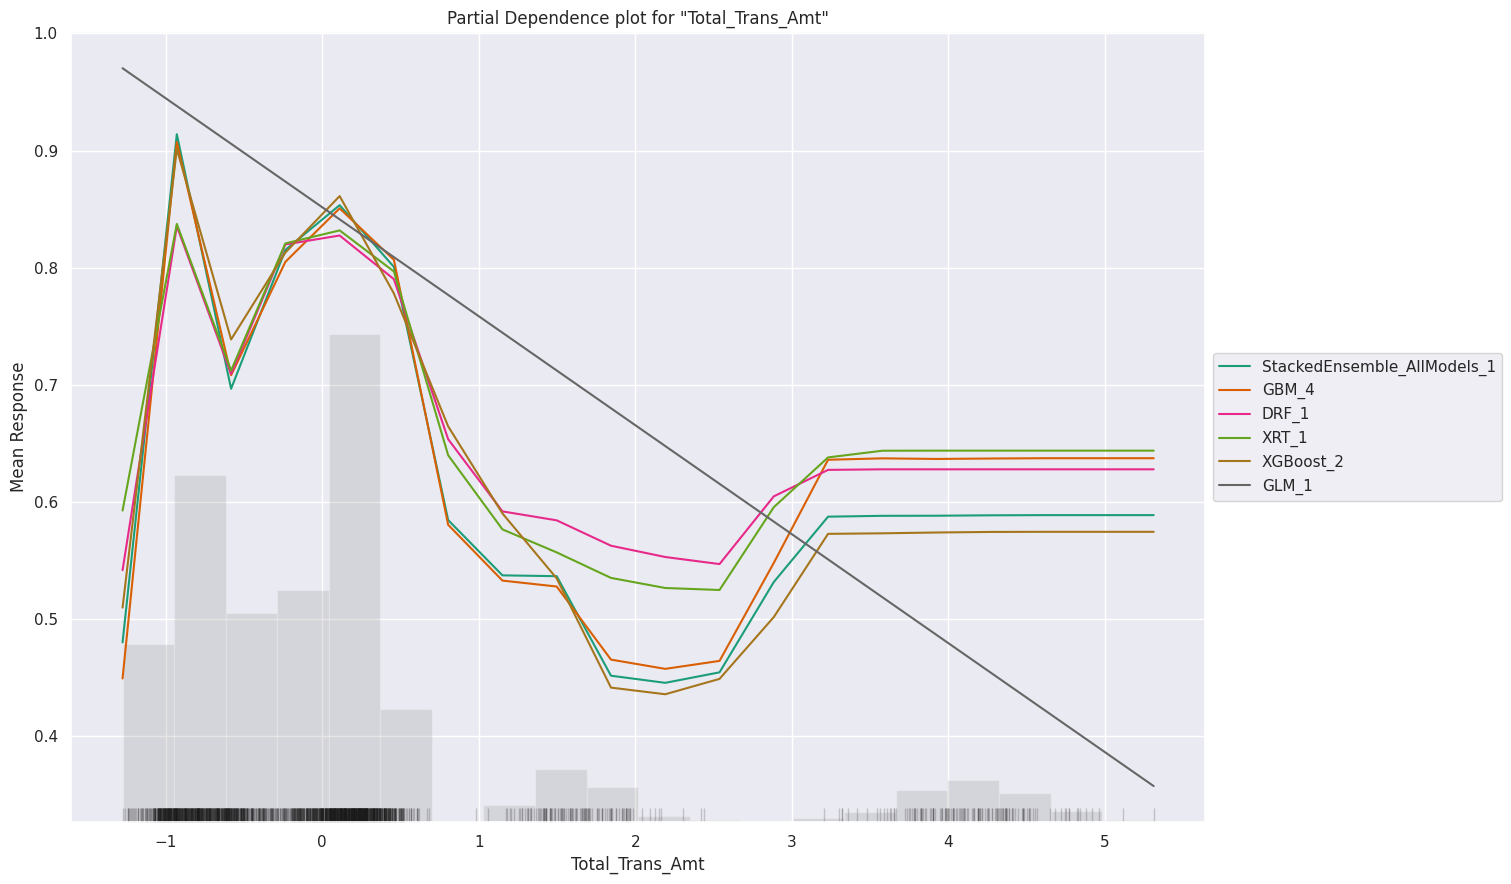

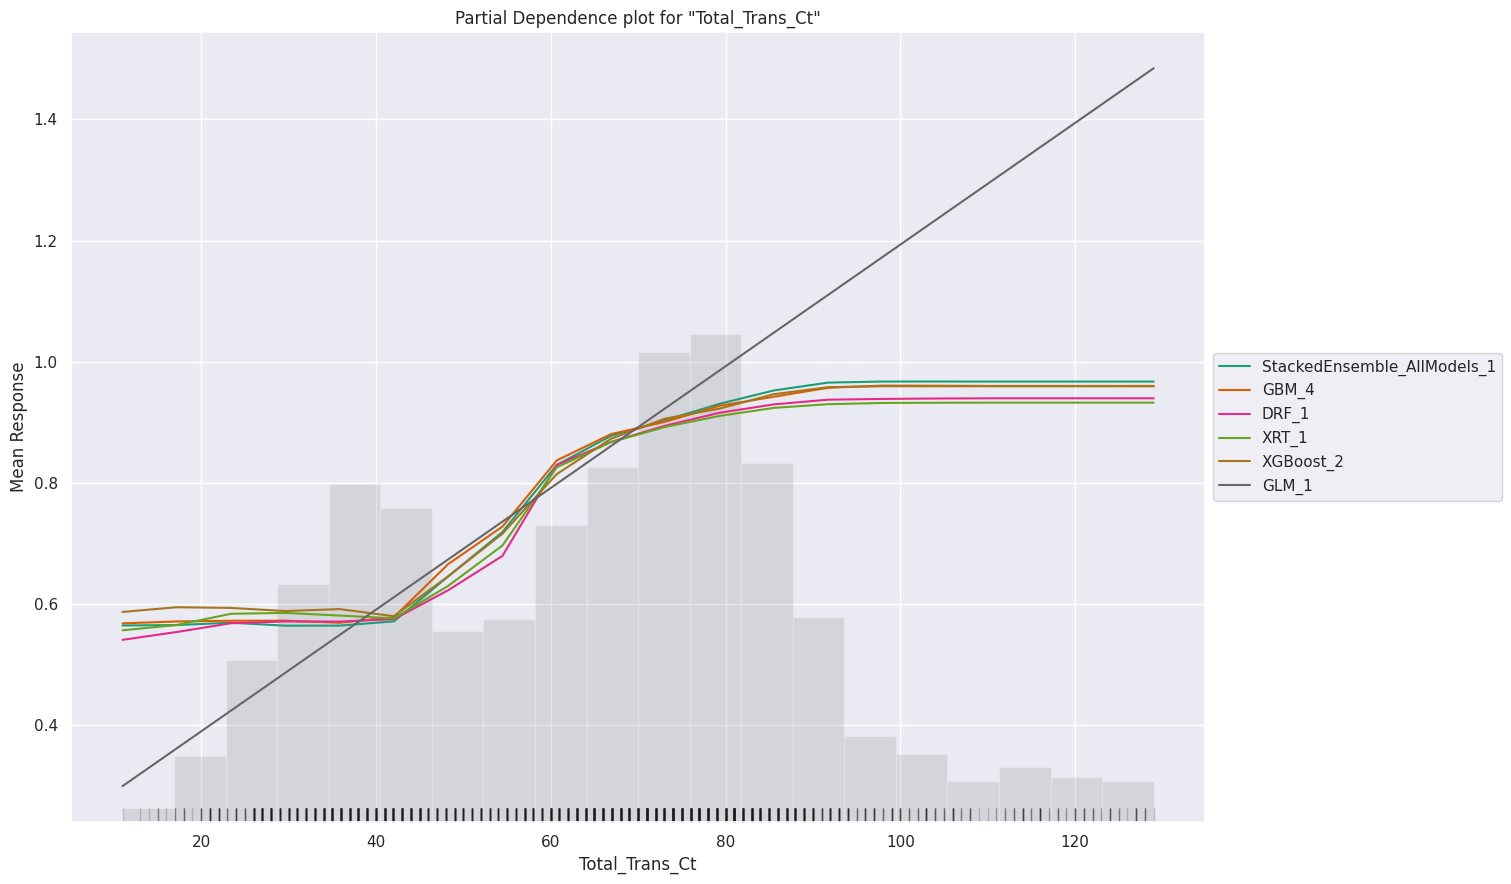

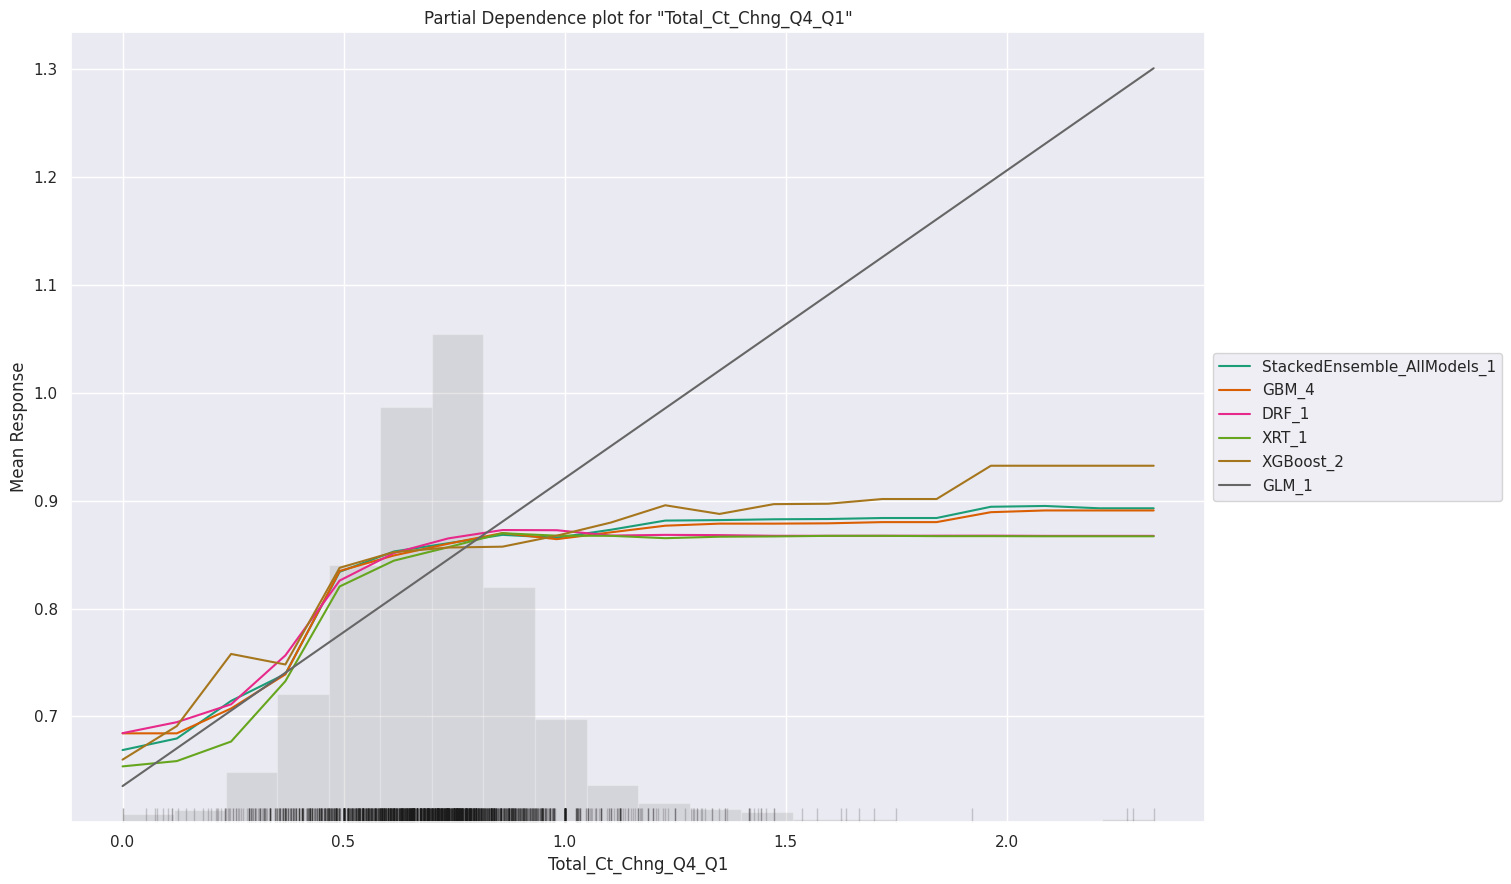

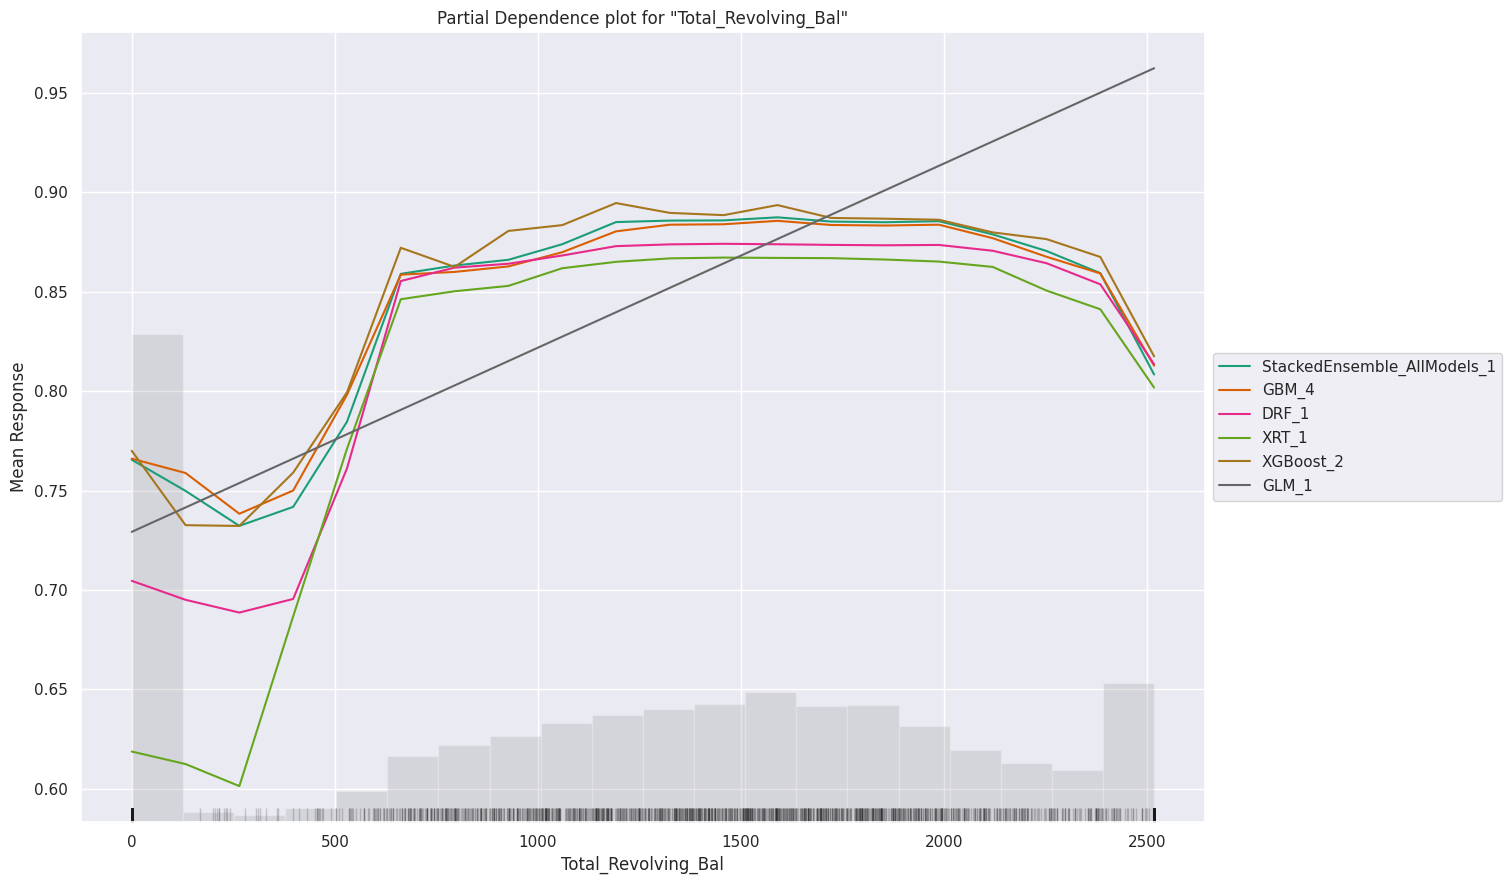

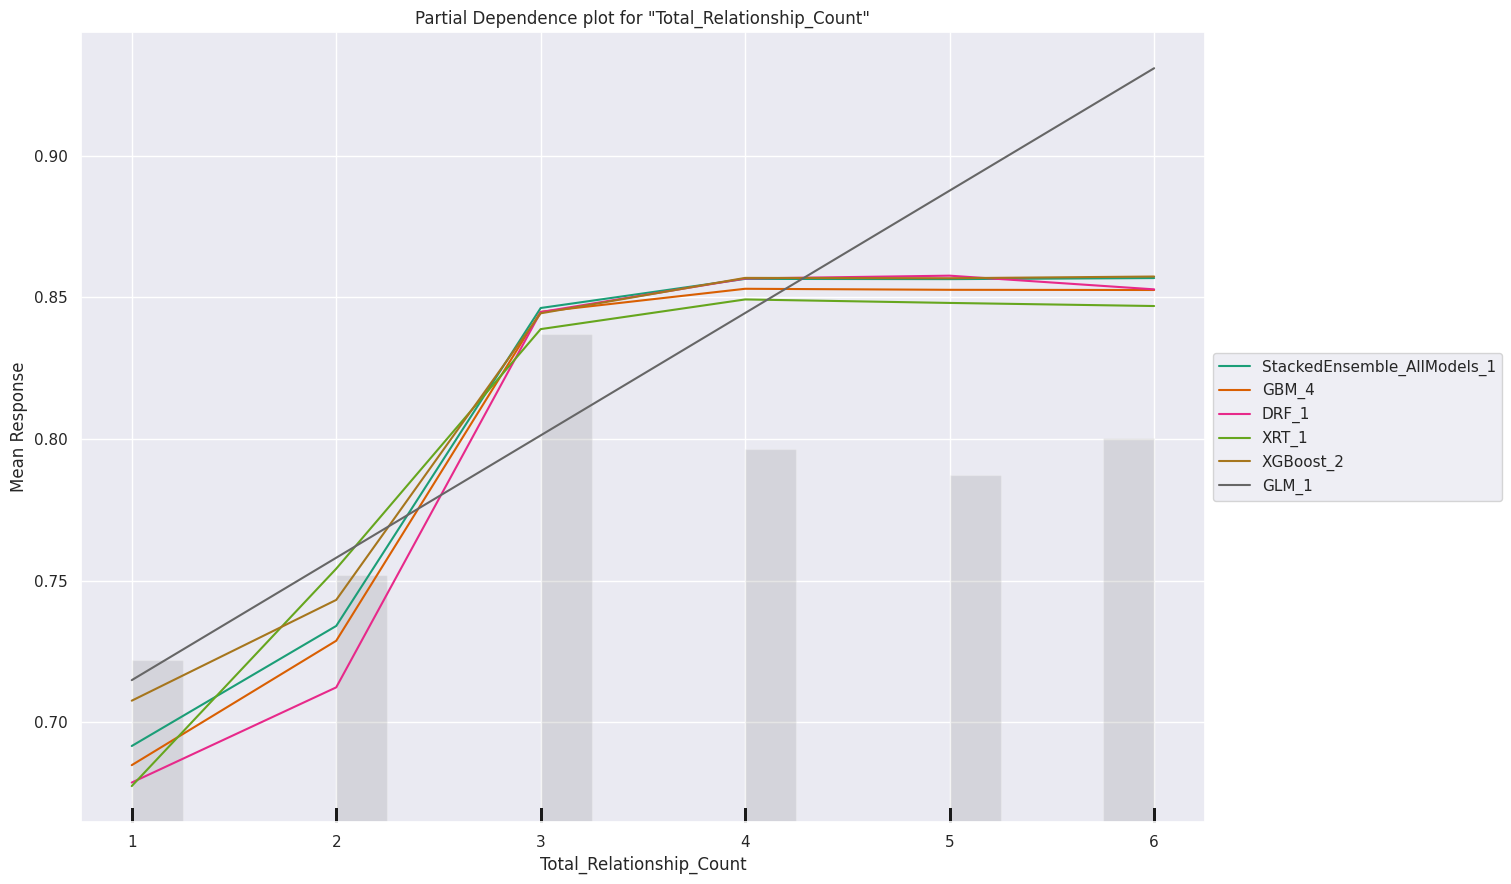

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

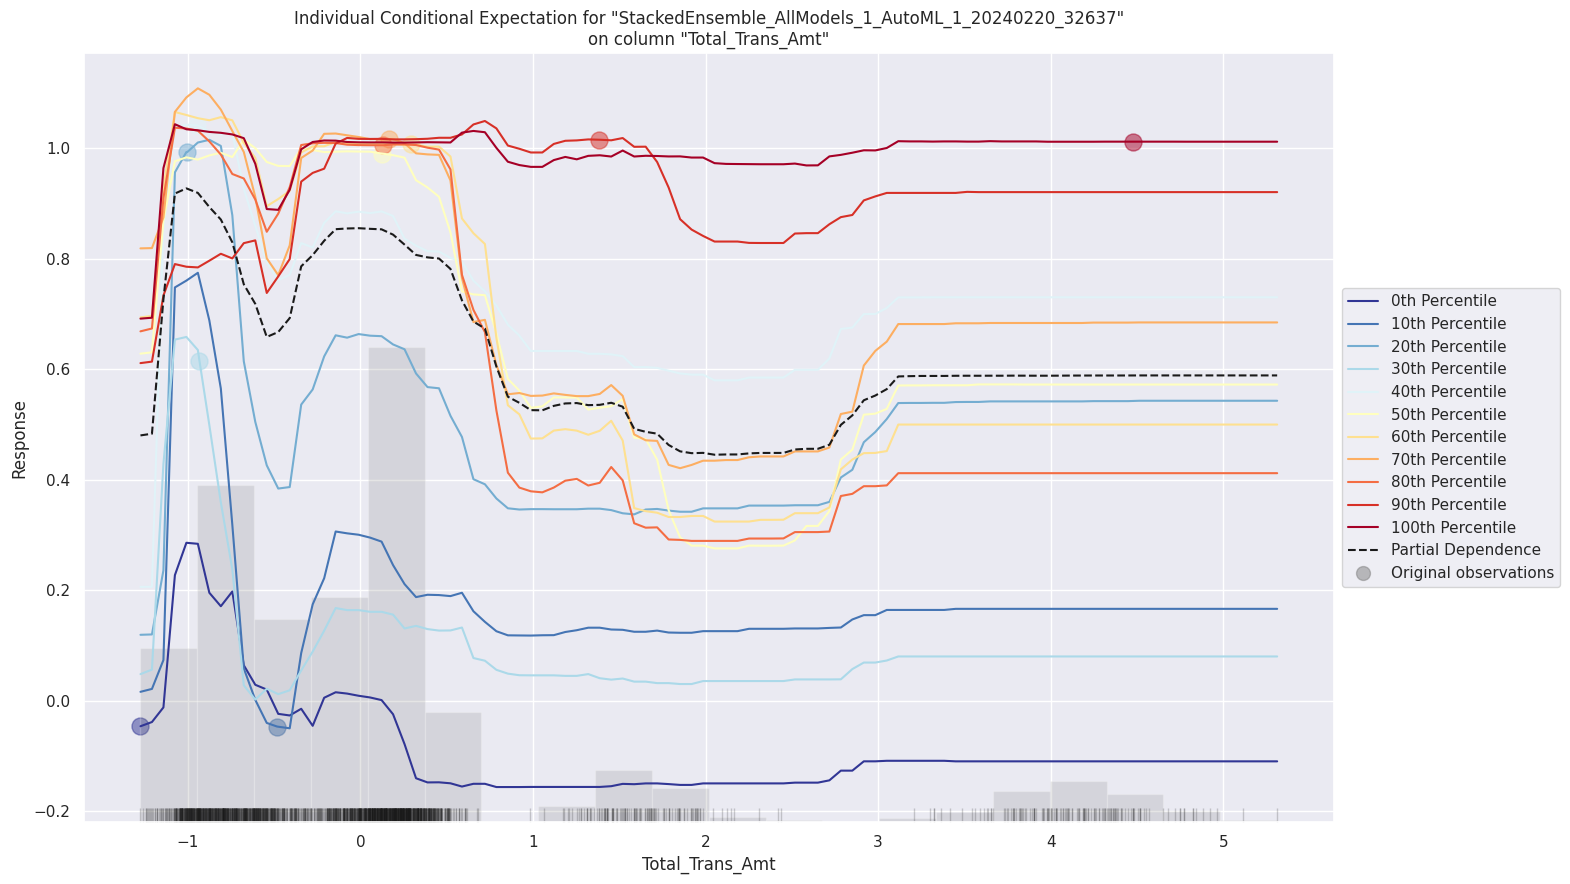

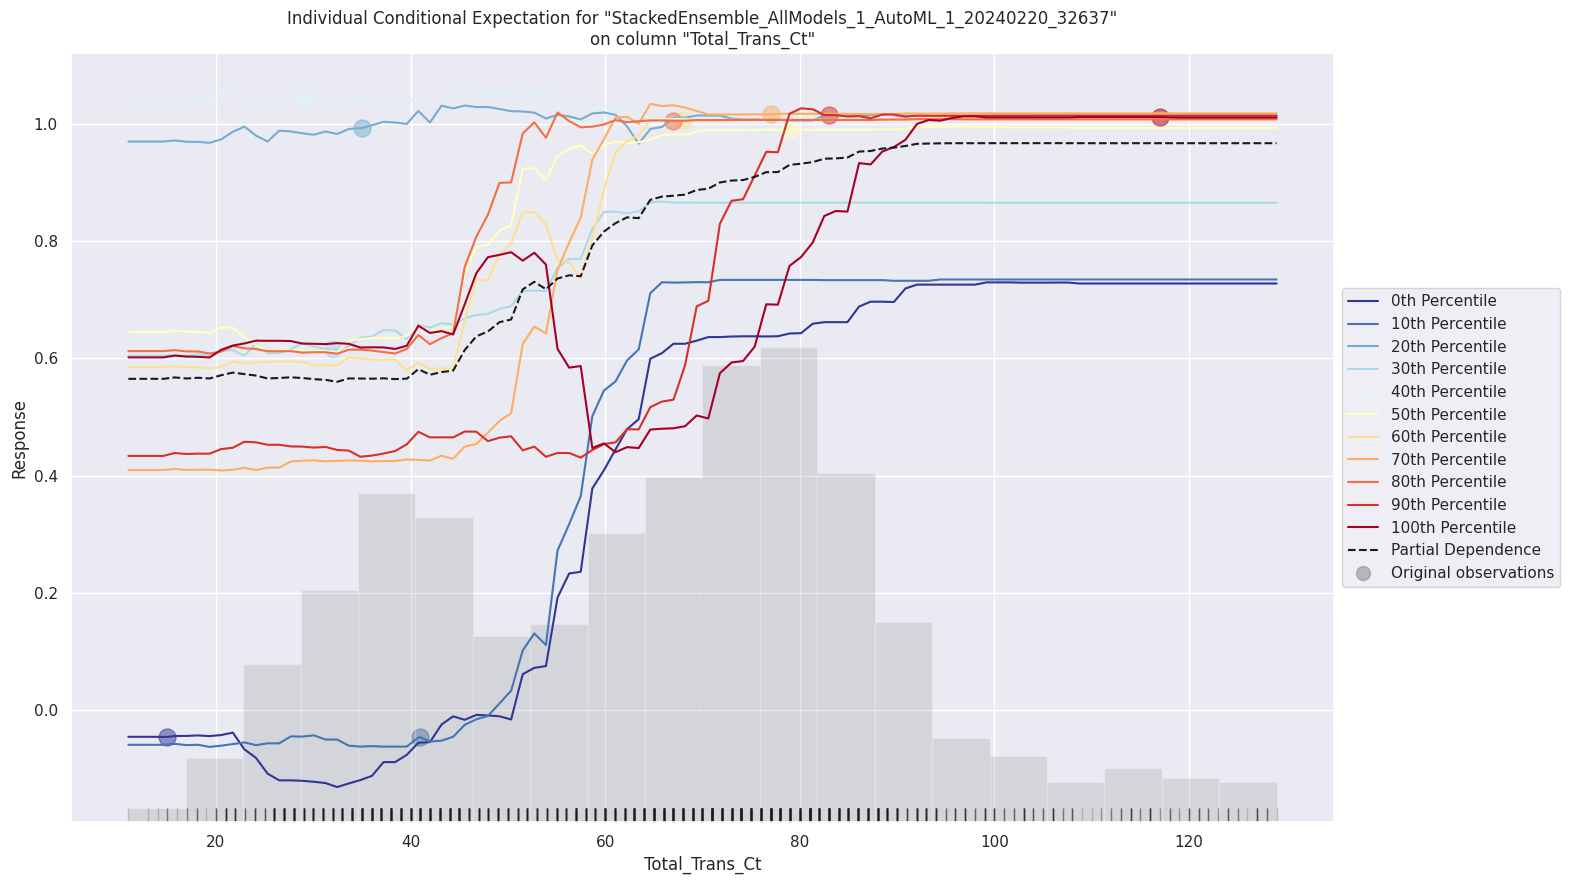

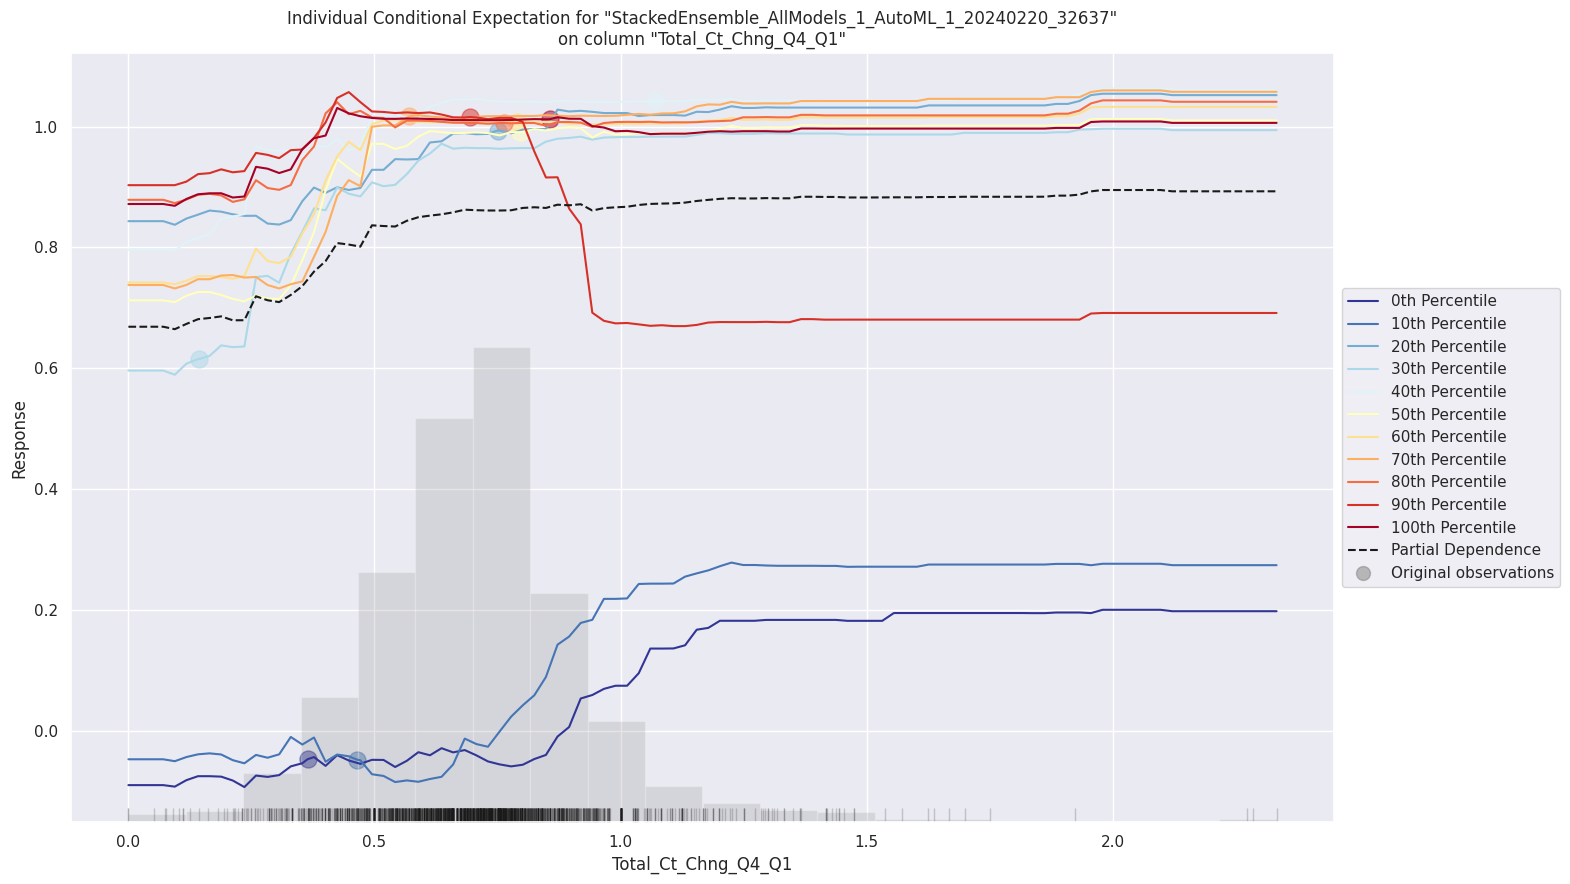

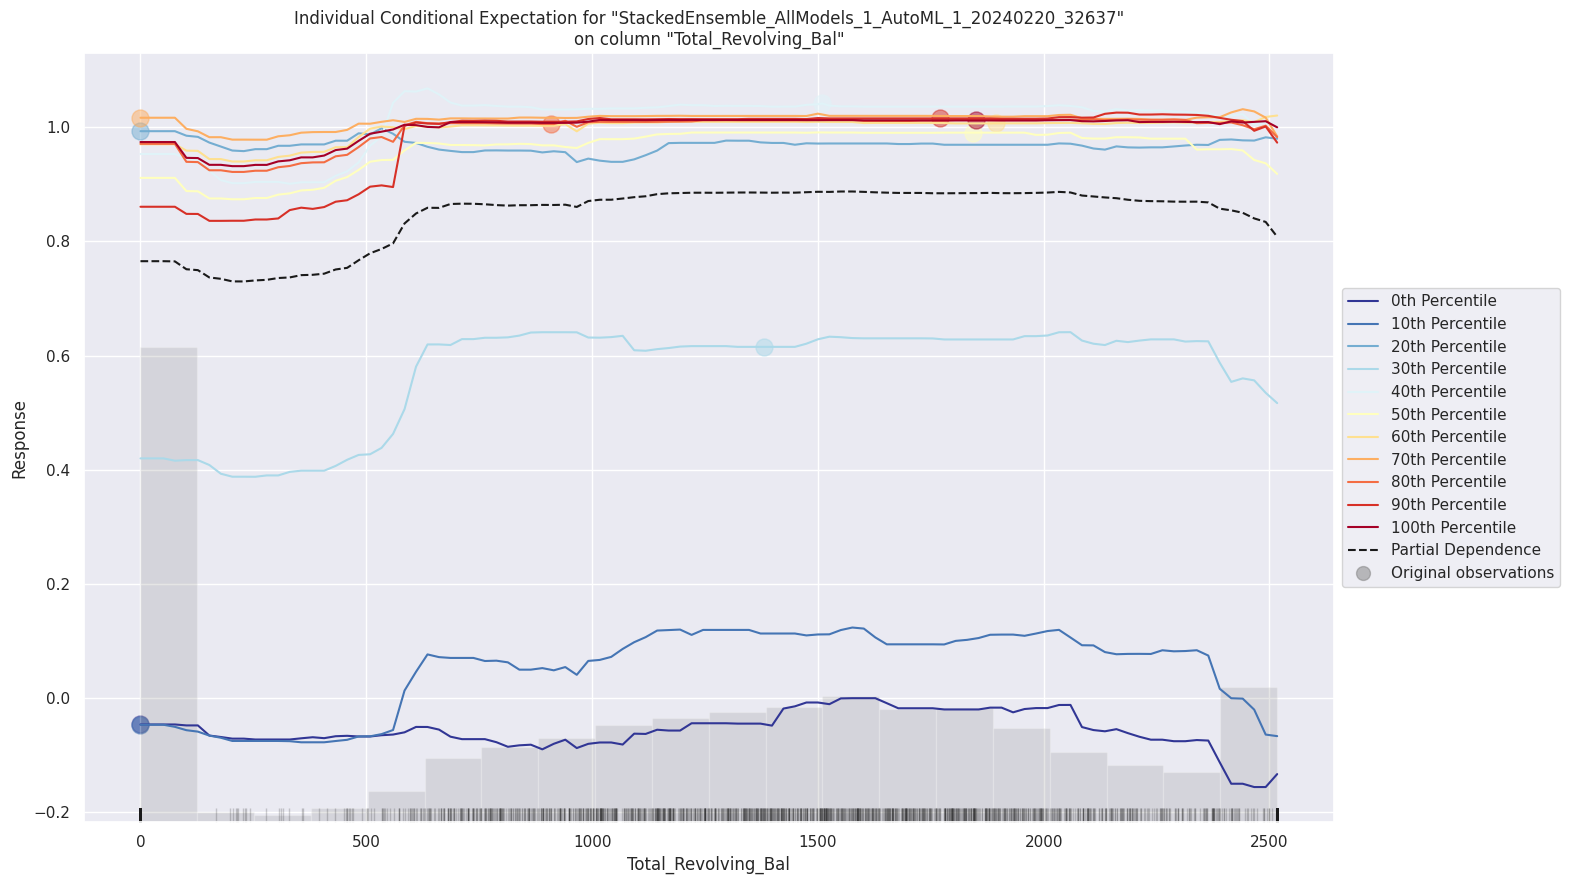

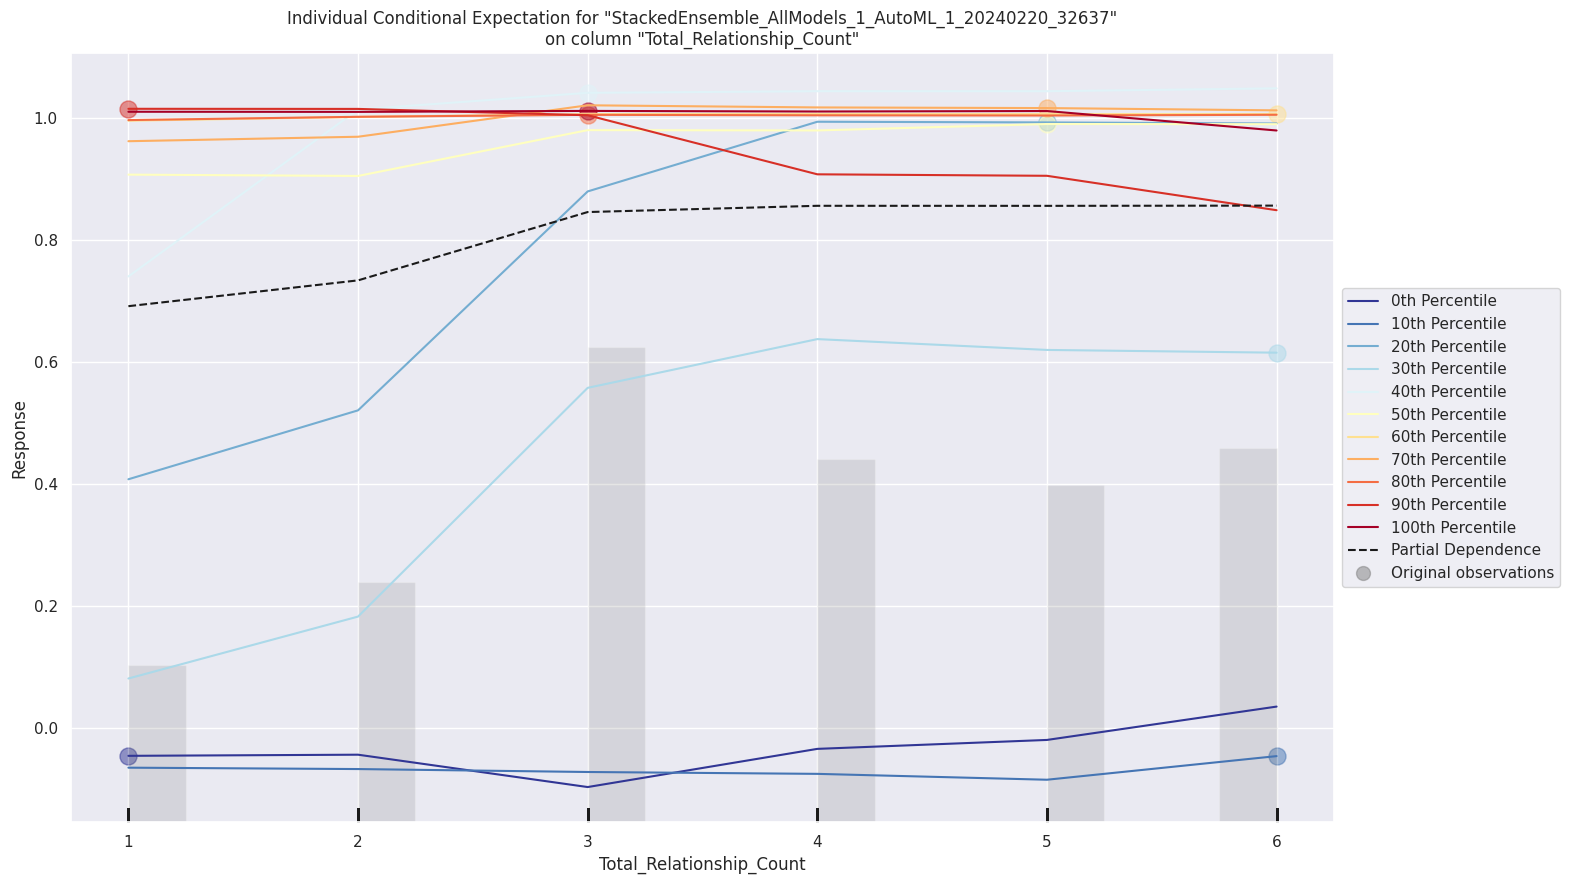

In [138]:
explain_model = aml.explain(frame = hf_test)

#Conclusion -
In this AutoML assignment, we utilized H2O.ai to predict customer credit card churn, achieving an accuracy of 89.9% with the 'gbm' model on data from a dataset of 10,127 bank customers. While demonstrating the effectiveness of automated machine learning in churn prediction, opportunities for improvement remain, including exploring outlier removal and ensemble methods to enhance predictive performance. Overall, this assignment highlights the potential of AutoML to streamline model development and enhance decision-making in banking and finance.

#Assignment Question/Answers

-------
***Q1) Is the relationship significant?***

Ans 1.**Definition of Statistical Significance:** Statistical significance is determined by the p-value, representing the probability of observing a result, assuming the null hypothesis (no relationship between variables) is true. A small p-value (< 0.05) indicates a significant relationship between variables, suggesting that the null hypothesis can be rejected.

**Interpretation of Results:** Using the OLS method, most variables in the dataset exhibited p-values below 0.05, indicating a significant relationship with the outcome (churn status). However, variables such as 'Months_on_Books' and 'Avg_Utilization_Ratio' had p-values exceeding 0.05, suggesting a lack of statistical significance for these predictors in predicting customer churn.

---------
***Q2) Are any model assumptions violated?***

Ans 2. a) A correlation matrix can be used to establish whether there is minimal or no multicollinearity. A few of the assumptions are not met by this model. There is multicollinearity between the customer_age and months_on_book.

b) The Durbin-Watson test yields no autocorrelation results. The Durbin-Watson statistic has a range of 0 to 4, with a value close to 2 indicating no autocorrelation. Positive autocorrelation is indicated by a number less than 2, especially as low as 1.720.

----
***Q3) Is there any multicollinearity in the model?***

Ans 3. In the model, multicollinearity is observed when one independent variable exhibits a strong correlation with another independent variable. This phenomenon undermines the statistical significance of individual independent variables. Multicollinearity can be identified by computing the correlation matrix or calculating the Variance Inflation Factor (VIF) for all variables. A correlation coefficient closer to +1 or -1 in the correlation matrix indicates a high degree of correlation between two variables. Similarly, a VIF value exceeding 10 signifies the presence of multicollinearity. In our model, certain variables displayed VIF values greater than 10, accompanied by p-values exceeding 0.05, signaling the presence of multicollinearity and potentially compromising the model's reliability. Currently high correlation exists between 'Customer_Age' & 'Months_on_books'.

-----
***Q4) In the multivariate models are predictor variables independent of all the other predictor variables?***

Ans 4. No, when there is no relationship between variables, they are referred to as independent leaving target variable. Correlation matrices can be used to examine this relationship, or graphs can be used to see if any patterns are followed. 'Customer_Age', 'Months_on_Book', 'Avg_Open_Buy' & 'Credit_Limit' are shown to be connected with each other when the correlation matrix for the model is computed. The remaining predictions, except from these, are independent from each other.

----
***Q5) In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.***

Ans 5. From the variable importance plot, the most to least important variables are displayed. For my model Total_Trans_Ct, Total_Trans_Amt, Total_Ct_Chng_Q4_Q1 & Total_Revolving_Bal are top 4 most important variables to determine churning rate of customer. VIF and p-values for Months_on_Book, Avg_Utilization_Ratio, Customer_Age, Credit_Limit & Avg_Open_To_Buy was high than the ideal values.

-----
***Q6) Does the model make sense?***

Ans 6. A model must have a p value and a VIF that are inside their respective ranges and adhere to all the assumptions in order to be logical. Taking into account the target variable's minimum and maximum values, the RMSE should be as low as feasible. Aside from that, R2 is also 0.89, which is regarded as having good accuracy. Thus, the model makes sense in general. Depending on how important they are, some more factors may be eliminated to improve accuracy. Moreover, outliers can be eliminated, boosted, or an ensemble model applied.

----
***Q7) Does regularization help?***

Ans 7. Ans - After performing 3 different types of regularization(Lasso, Ridge, and Elastic Net), it is seen that regularization has no effect. When we train the dataset without regularization, all the metrics including RSME & MSE are greater for the dataset that is trained without regularization. Hence it can be concluded that for this model regularization does not help.

-----
***Q8) Which independent variables are significant?***

Ans 8. Variables are significant when p-value is less than 0.05. For this model except for 'Total_Relationship_Count','Total_Trans_Ct', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1' & 'Total_Revolving_Bal' all other variables have p-value less than 0.05. So, it can be said that all variables are significant.

----
***Q9) Which hyperparameters are important?***

Ans 9.
 a) Model Training H2OAutoML Hyperparameters:

max_runtime_secs: Specifies the maximum duration (in seconds) allowed for the AutoML process to run. If the time limit is reached, the process terminates, returning the best model found up to that point.
sort_metric: Determines the metric used to evaluate and rank the performance of models during the AutoML process. In this case, 'MAE' (Mean Absolute Error) is utilized to assess and compare model performance.
max_models: Sets the maximum number of models that can be generated during the AutoML process. The process concludes when this limit is reached.
seed: Establishes a reproducible seed for generating random processes during model development. This ensures consistent results across multiple runs, aiding in reproducibility and comparison of findings.

b) H2OGeneralizedLinearEstimator Hyperparameters for Regularization:

family: Specifies the distribution type for the response variable. For binary classification tasks like yours (predicting churn), 'binomial' is chosen.
lambda_: Controls the regularization strength (lambda parameter). Smaller values result in stronger regularization, preventing overfitting by penalizing large coefficients.
alpha: Determines the balance between L1 (Lasso) and L2 (Ridge) regularization. A value of 0 indicates pure L2 regularization, while 1 corresponds to pure L1 regularization. Values between 0 and 1 provide a mix of both regularization techniques, offering flexibility in addressing model complexity and feature selection.

-----

***Q10) Coding professionalism?***

Ans 10. Yes



#References:

* H2O Documentation: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html?_ga=2.129161676.1179250264.1708398551-1770022984.1708209167
* Scikit-Learn Documentation: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
* Seaborn Documentation: https://seaborn.pydata.org/tutorial/introduction.html
* Analytics Vidhya - https://www.analyticsvidhya.com/blog/2023/01/the-future-of-machine-learning-automl/
* OLS Model- http://net-informations.com/ds/mla/ols.html
* StatsModel - https://www.statsmodels.org/stable/index.html
* AutoML Documents - https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e

#MIT LICENSE:

MIT License

Copyright (c) 2024 ckulkarni13

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.